# Problem Statement - I

## Introduction

This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

 

## Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

**The client with payment difficulties:** he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

 

**When a client applies for a loan, there are four types of decisions that could be taken by the client/company):**

**Approved:** The Company has approved loan Application

**Cancelled:** The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

**Refused:** The company had rejected the loan (because the client does not meet their requirements etc.).

**Unused offer:**  Loan has been cancelled by the client but at different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.

 

**Business Objectives**

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.

**1. 'application_data.csv'**  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

 

**2. 'previous_application.csv'** contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.

 

**3. 'columns_description.csv'** is data dictionary which describes the meaning of the variables.

# Import Libraries:

Importing all the necesseary libraries required for this assignment:

* Pandas: For Dataframe purpose.
* Numpy: For algebric calculation purpose.
* Matplotlib and Seaborn : For Plotting purpose.

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes = True)

In [2]:
# Ignoring the warnings

import warnings
warnings.simplefilter('ignore')

#### Datasets mentioned below are given to us. 
1. 'application_data.csv'  
    contains all the information of the client at the time of application. 
    The data is about whether a client has payment difficulties.
 
2. 'previous_application.csv'
    contains information about the client’s previous loan data. 
    It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.

3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.

Read the required file and check the details present inside that using pandas module and its methods.

In [3]:
# Reading the 'Applications' file

df_app = pd.read_csv('application_data.csv')

#setting the column width to max to read the description
pd.options.display.max_columns = None

df_app.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# Reading the 'Previous Application data'

df_prev = pd.read_csv('previous_application.csv')

#setting the column width to max to read the description
pd.options.display.max_columns = None

df_prev.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#checking the shape

df_app.shape

(307511, 122)

**We can see that, there are nearly 307511 rows and 122 columns present in the Application Dataset.**

In [6]:
#checking the shape

df_prev.shape

(1670214, 37)

**We can see that, there are nearly 1670214 rows and 37 columns present in the Previous Application Dataset.**

### Data Cleaning:

We need to work on missing values, Typo errors, Column names which are large make it readable, checking valid data avaiable or not etc.

### Data Cleaning on application_data dataset

In [7]:
#checking for describe() of application_dataset

df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [8]:
# Getting the list of column names in the application_dataset

print(df_app.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


**Checking null values present in each of the columns and calculating the percentage of it.**

In [9]:
#checking null values

df_null = df_app.isnull().sum()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_null

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [10]:
# let us observer the percentage of null values and also round off the percentage to 2 decimals

df_app_percent = round((100*df_app.isnull().sum()/len(df_app)), 2)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_app_percent

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [11]:
# Total number of columns having null values

print(len(df_app_percent))

122


##### Considering the threshold as 40%, we will drop columns that have missing values greater than 40% and drop them.

In [12]:
# Dropping the missing/null values more than 19%

df_app = df_app.loc[:, df_app.isnull().mean() <= .19]

In [13]:
# Verifying if the columns are dropped

len(df_app.columns)

71

#### No of columns now are reduced to 71 now.

In [14]:
# lets re-check the % of missing values after dropping above 40% missing values

round((100*df_app.isnull().sum()/len(df_app)), 2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

### Data Cleaning on previous_application dataset

In [15]:
# Checking the null values

df_prev_null = df_prev.isnull().sum()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_prev_null

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [16]:
# let us observer the percentage of null values and also round off the percentage to 2 decimals

df_prev_percent = round((100*df_prev.isnull().sum()/len(df_prev)), 2)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_prev_percent

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [17]:
# Total number of columns in previous_application

print(len(df_prev.columns))

37


#### Considering the threshold as 20%, we will drop columns that have missing values greater than 20% and drop them.

In [18]:
# Dropping the missing/null values more than 20%

df_prev = df_prev.loc[:, df_prev.isnull().mean() <= .20]

In [19]:
# Verifying if the columns are dropped

print(len(df_prev.columns))

23


#### No of columns now are reduced to 23 now.

In [20]:
# lets re-check the % of missing values after dropping above 20% missing values

round((100*df_prev.isnull().sum()/len(df_prev)), 2)

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY           0.00
NAME_YIELD_GROUP               0.00
PRODUCT_COMBINATION            0.02
dtype: float64

##### Upon checking the previous_application, there seems no such null values present in the dataset, so no treatment is required.

## Imputing the missing values

### Imputing the missing values in 'application_dataset'

##### Cleaning Name_Type_Suite column 

In [21]:
# Checking for mode of Name_type_Suite column.

df_app['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [22]:
# Filling the missing values with mode value i.e. 'Unaccompanied', as it the most occurring value in the column.

df_app['NAME_TYPE_SUITE'].fillna(value = 'Unaccompanied', inplace=True)

##### Cleaning Numerical column 

In [23]:
# Filtering the column names with AMT in them

AMT_COLUMNS = list(filter(lambda X: 'AMT' in X  , df_app))
AMT_COLUMNS

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [24]:
#checking null values

df_app[['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']].isnull().sum().sort_values(ascending = False)

AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
dtype: int64

In [25]:
df_app[['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']].mode()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,135000.0,450000.0,9000.0,450000.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df_app[['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']].mean()

AMT_INCOME_TOTAL              168797.919297
AMT_CREDIT                    599025.999706
AMT_ANNUITY                    27108.573909
AMT_GOODS_PRICE               538396.207429
AMT_REQ_CREDIT_BUREAU_HOUR         0.006402
AMT_REQ_CREDIT_BUREAU_DAY          0.007000
AMT_REQ_CREDIT_BUREAU_WEEK         0.034362
AMT_REQ_CREDIT_BUREAU_MON          0.267395
AMT_REQ_CREDIT_BUREAU_QRT          0.265474
AMT_REQ_CREDIT_BUREAU_YEAR         1.899974
dtype: float64

In [27]:
# Filling the AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, 
# AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR with '0' as the most of the values are '0' in the columns.

df_app.loc[:,'AMT_REQ_CREDIT_BUREAU_HOUR':'AMT_REQ_CREDIT_BUREAU_YEAR'] = df_app.loc[:,'AMT_REQ_CREDIT_BUREAU_HOUR':'AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0) 

In [28]:
# We can impute the mean value of AMT_GOODS_PRICE.

df_app['AMT_GOODS_PRICE'].fillna(df_app.AMT_GOODS_PRICE.mean(), inplace=True)

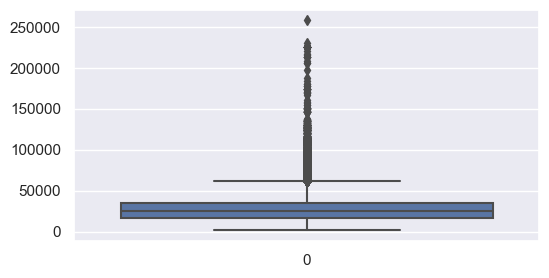

In [29]:
plt.figure(figsize = (6,3))
sns.boxplot(df_app.AMT_ANNUITY)
plt.show()

In [30]:
# Since the AMT_ANNUITY column has an outlier, so replacing the null values with the mean values would be proven harmful for 
# the analysis, that's why replacing it with the median values.

df_app['AMT_ANNUITY'].fillna(df_app.AMT_ANNUITY.median(), inplace=True)

In [31]:
# Rechecking the application_dataset for the null values.

round((100*df_app.isnull().sum()/len(df_app)), 2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.00
NAME_TYPE_SUITE                0.00
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
CNT_FAM_MEMBERS             

### Checking the data-types of the columns

In [32]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

#### Lets now check the columns that have SOCIAL with null values in them

In [33]:
#filtering the column names with SOCIAL in them

SOCIAL_COLUMNS = list(filter(lambda X: 'SOCIAL' in X  , df_app))
SOCIAL_COLUMNS

['OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

In [34]:
#checking null values

df_app[['OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']].isnull().sum()

OBS_30_CNT_SOCIAL_CIRCLE    1021
DEF_30_CNT_SOCIAL_CIRCLE    1021
OBS_60_CNT_SOCIAL_CIRCLE    1021
DEF_60_CNT_SOCIAL_CIRCLE    1021
dtype: int64

Lets us calculate the percentage to see if this creates an impact in the total data

In [35]:
#calculating null value percentage
df_app[['OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']].isnull().sum()/df_app.shape[0]*100

OBS_30_CNT_SOCIAL_CIRCLE    0.332021
DEF_30_CNT_SOCIAL_CIRCLE    0.332021
OBS_60_CNT_SOCIAL_CIRCLE    0.332021
DEF_60_CNT_SOCIAL_CIRCLE    0.332021
dtype: float64

Since, it is 0.33, we can ignore these null values

#### Lets now handle columns that have SOCIAL

In [36]:
#we have earlier defined SOCIAL_COLUMNS while handling null values

SOCIAL_COLUMNS

['OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

#### Checking the outliers in OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE using BOX PLOT

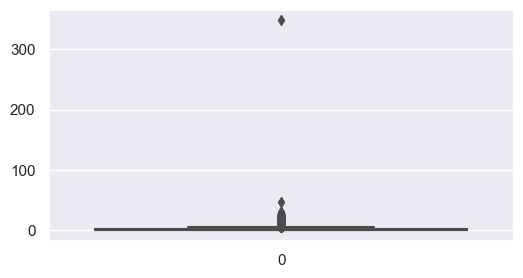

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
50%           0.000000
80%           3.000000
90%           4.000000
99%          10.000000
99.9%        17.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


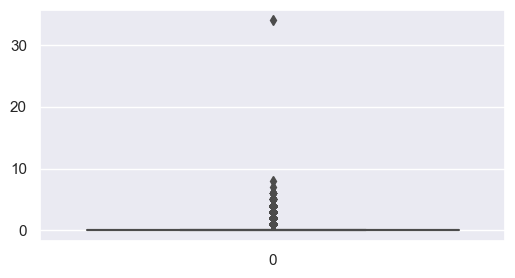

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
50%           0.000000
80%           0.000000
90%           1.000000
99%           2.000000
99.9%         4.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


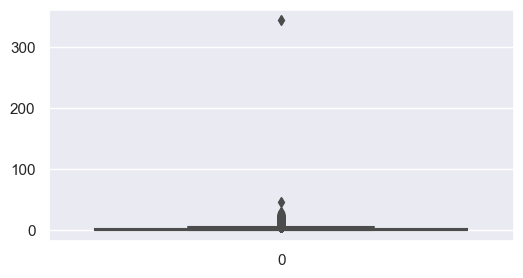

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
50%           0.000000
80%           3.000000
90%           4.000000
99%          10.000000
99.9%        16.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


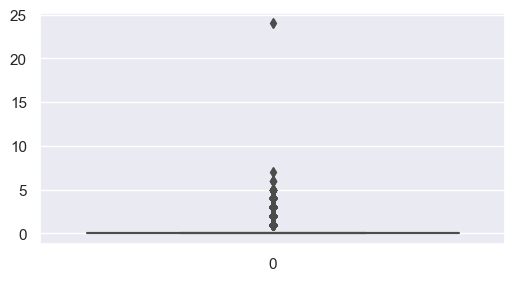

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
50%           0.000000
80%           0.000000
90%           0.000000
99%           2.000000
99.9%         3.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


In [37]:
#using describe function to know the exact values of boxplot(like 25%,50th%,75%, max, etc)

for i in SOCIAL_COLUMNS:
    plt.figure(figsize=(6,3))
    sns.boxplot(df_app[i])
    plt.show()
    print(df_app[i].describe(percentiles = [0.999,0.99,0.9,0.8]))

#### Observations from the above BOXPLOT of OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE
1. OBS_30_CNT_SOCIAL_CIRCLE: 
On naked eye, we could clearly see that 50 and 350 are outliers as these are above 99.9%.
2. DEF_30_CNT_SOCIAL_CIRCLE: 90% is 1. 99% is 2, which also seems to have outliers.
3. OBS_60_CNT_SOCIAL_CIRCLE: this is similar to OBS_30_CNT_SOCIAL_CIRCLE, 50 and 350 are outliers as above 99.9%.
4. DEF_60_CNT_SOCIAL_CIRCLE: this is similar to DEF_30_CNT_SOCIAL_CIRCLE.


#### Lets analyze Columns that have DAYS

In [38]:
#filtering the column names with days in them

DAYS_COLUMNS = list(filter(lambda X: 'DAYS' in X  , df_app))
DAYS_COLUMNS

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [39]:
#using the describe function to see the values

df_app[DAYS_COLUMNS].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373,-962.858788
std,4363.988632,141275.766519,3522.886321,1509.450419,826.808487
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000,-4292.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000,-1570.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000,-757.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000,-274.000000
max,-7489.000000,365243.000000,0.000000,0.000000,0.000000


#### Fixing negative values Days columns

1. Maybe the days were marked backwards and hence the negative, but let's convert these to positive values. 
2. As the abs() function returns the absolute value of the existing number, we can use this function to remove negative values. 

In [40]:
#applying abs() function using for loop

for i in DAYS_COLUMNS:
    df_app[i]=abs(df_app[i])

In [41]:
#verifying the data now to see if there are any negative values

df_app[DAYS_COLUMNS].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,16036.995067,67724.742149,4986.120328,2994.202373,962.858788
std,4363.988632,139443.751806,3522.886321,1509.450419,826.808487
min,7489.000000,0.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,2010.000000,1720.000000,274.000000
50%,15750.000000,2219.000000,4504.000000,3254.000000,757.000000
75%,19682.000000,5707.000000,7479.500000,4299.000000,1570.000000
max,25229.000000,365243.000000,24672.000000,7197.000000,4292.000000


#### For easy understanding, let convert the days into years and check the heads of new columns

In [42]:
#Diving the value by 365 and rounding it off to 0.
#created respective columns in years

df_app['AGE_IN_YEARS'] = round(df_app.DAYS_BIRTH/365,0)
df_app['EMPLOYMENT_YEARS']= round(df_app.DAYS_EMPLOYED/365,0)
df_app['REGISTRATION_YEARS'] = round(df_app.DAYS_REGISTRATION/365,0)
df_app['YEARS_ID_PUBLISH'] = round(df_app.DAYS_ID_PUBLISH/365,0)
df_app['LAST_PHONE_CHANGE_YEARS'] = round(df_app.DAYS_LAST_PHONE_CHANGE/365,0)

In [43]:
#verifying the shape of the dataframe

df_app.shape

(307511, 76)

#### Dropping comlums with Days

> Since, we convered the days into years, it now has same data in two different units. Lets delete the columns that has 'DAYS' in it. <br>

In [44]:
#knowing the shape before dropping

df_app.shape

(307511, 76)

In [45]:
#dropping DAYS columns
df_app.drop(DAYS_COLUMNS,axis=1,inplace=True)

#checking shape after dropping
df_app.shape

(307511, 71)

#### Examining outliers for the above newly created columns AGE_IN_YEARS, EMPLOYMENT_YEARS, DAYS_ID_PUBLISH, REGISTRATION_YEARS, LAST_PHONE_CHANGE_YEARS

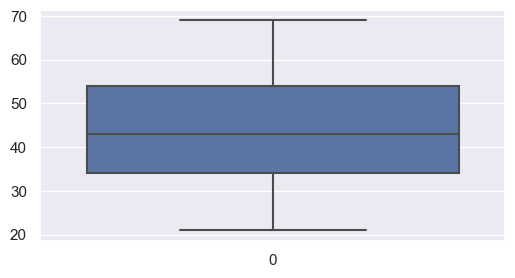

count    307511.000000
mean         43.938646
std          11.964047
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: AGE_IN_YEARS, dtype: float64


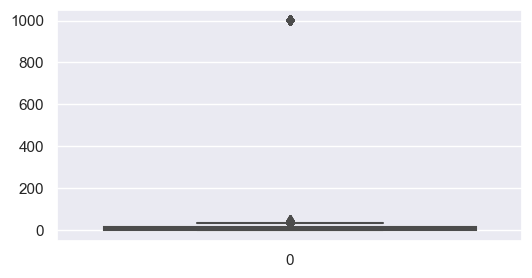

count    307511.000000
mean        185.608021
std         382.165887
min           0.000000
25%           3.000000
50%           6.000000
75%          16.000000
max        1001.000000
Name: EMPLOYMENT_YEARS, dtype: float64


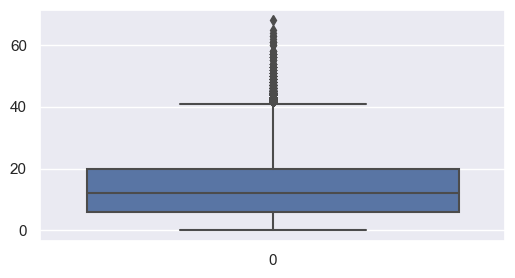

count    307511.000000
mean         13.659440
std           9.659369
min           0.000000
25%           6.000000
50%          12.000000
75%          20.000000
max          68.000000
Name: REGISTRATION_YEARS, dtype: float64


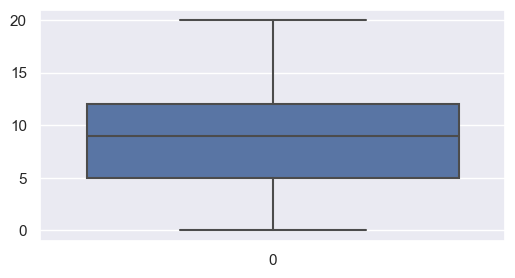

count    307511.000000
mean          8.198575
std           4.151520
min           0.000000
25%           5.000000
50%           9.000000
75%          12.000000
max          20.000000
Name: YEARS_ID_PUBLISH, dtype: float64


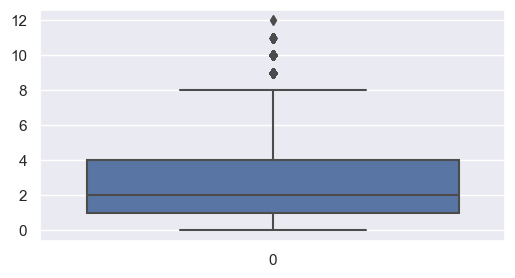

count    307510.000000
mean          2.632870
std           2.281344
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          12.000000
Name: LAST_PHONE_CHANGE_YEARS, dtype: float64


In [46]:
#created list for Years
#using describe() to know the exact values of boxplot(like 25%,50th%,75%, max, etc)

Years=['AGE_IN_YEARS', 'EMPLOYMENT_YEARS', 'REGISTRATION_YEARS', 'YEARS_ID_PUBLISH', 'LAST_PHONE_CHANGE_YEARS']

for i in Years:
    plt.figure(figsize=(6,3))
    sns.boxplot(df_app[i])
    plt.show()
    print(df_app[i].describe())


#### Observations from the above BOXPLOT of AGE_IN_YEARS, EMPLOYMENT_YEARS, DAYS_ID_PUBLISH, REGISTRATION_YEARS, LAST_PHONE_CHANGE_YEARS
1. With domain knowledge, the Box plot looks okay even with the outliers as possible correct information except for Employment years.
2. The applicants have minimum age of 21 and max age of 69
3. We could see a values near to 1000 for employment years which is strange. Lets validate these rows have valid data

In [47]:
df_app.EMPLOYMENT_YEARS.value_counts().head()

1001.0    55374
1.0       34796
2.0       30530
3.0       27721
4.0       22933
Name: EMPLOYMENT_YEARS, dtype: int64

In [48]:
round((55374/df_app.shape[0]*100), 2)

18.01

In [49]:
df_app[df_app.EMPLOYMENT_YEARS==1001.0].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_IN_YEARS,EMPLOYMENT_YEARS,REGISTRATION_YEARS,YEARS_ID_PUBLISH,LAST_PHONE_CHANGE_YEARS
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,1,0,0,1,0,0,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.205747,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,55.0,1001.0,20.0,10.0,0.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,1,0,0,1,1,0,2.0,2,2,FRIDAY,7,0,0,0,0,0,0,XNA,0.555183,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,56.0,1001.0,14.0,7.0,7.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,1,0,0,1,1,0,2.0,3,3,FRIDAY,12,0,0,0,0,0,0,XNA,0.624305,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,68.0,1001.0,25.0,10.0,2.0
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006207,1,0,0,1,1,0,2.0,2,2,FRIDAY,11,0,0,0,0,0,0,XNA,0.650765,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,66.0,1001.0,27.0,14.0,0.0
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,675000.0,Unaccompanied,Pensioner,Higher education,Single / not married,House / apartment,0.010966,1,0,0,1,0,0,1.0,2,2,WEDNESDAY,9,0,0,0,0,0,0,XNA,0.766138,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,65.0,1001.0,16.0,13.0,1.0


1. Having employed for 1000 years is impossible but this category of data is 18% of the total data. <br> 
2. Deleting 18% of the data might impact the results. Also, the data in these rows seems to be valid. <br>
3. Let us leave it as it is for now. <br>

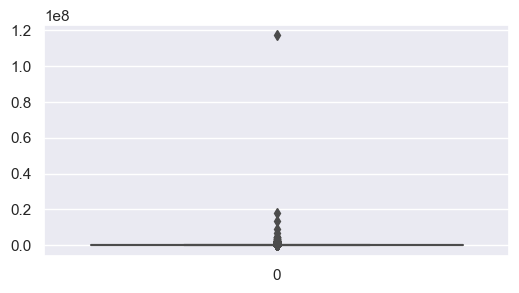

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


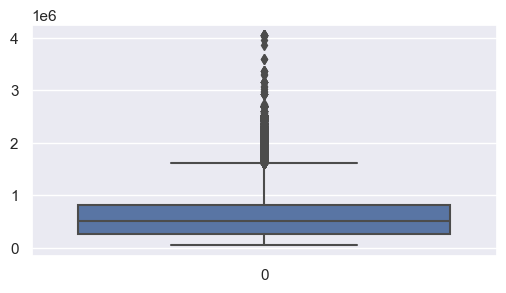

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


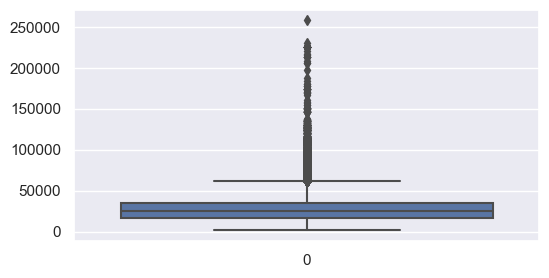

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


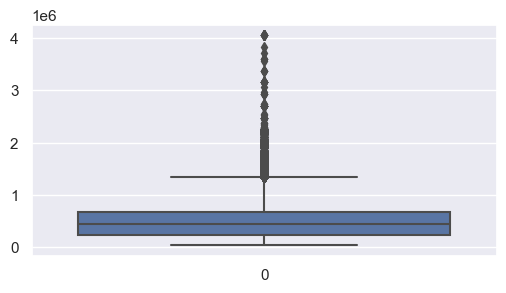

count    3.075110e+05
mean     5.383962e+05
std      3.692794e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


In [50]:
#using describe function to know the exact values of boxplot(like 25%,50th%,75%, max, etc)

AMT=['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE']

for i in AMT:
    plt.figure(figsize=(6,3))
    sns.boxplot(df_app[i])
    plt.show()
    print(df_app[i].describe())

#### Observations from the above BOXPLOT of AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE
1. AMT_INCOME_TOTAL: clearly has an outlier at 1170L. The variation between 75% and the max value is huge.
2. AMT_CREDIT : Though we have outlier, with the domain knowledge we know there can be credit of 40 Lakhs. We can ignore these outliers
3. AMT_ANNUITY : Though we have outlier, with the domain knowledge we know there can be annuity of 2.5 Lakhs. We can ignore these outliers
4. AMT_GOODS_PRICE : with domain knowledge, Goods price can clearly be worth 40L

#### Analysis of CNT_CHILDREN and CNT_FAM_MEMBERS columns

checking for outliers in both the columns.

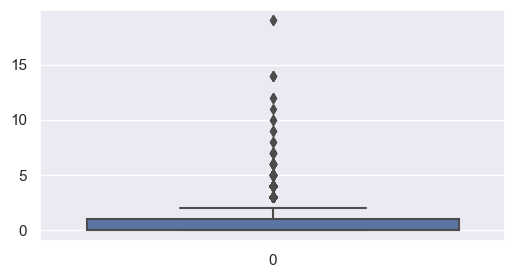

describe 
 count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
50%           0.000000
80%           1.000000
90%           2.000000
99%           3.000000
99.9%         4.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

 value_counts()  0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64


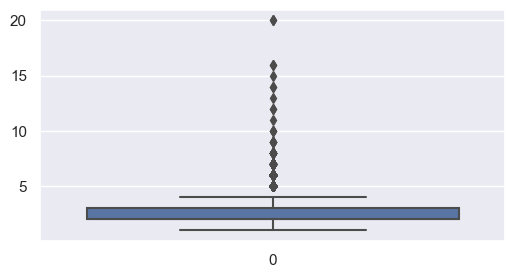

describe 
 count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
50%           2.000000
80%           3.000000
90%           3.000000
99%           5.000000
99.9%         6.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

 value_counts()  2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64


In [51]:
# created CNT_Coll to create list of CNT_CHILDREN & CNT_FAM_MEMBERS
#using describe function to know the exact values of boxplot(like 25%,50th%,75%, max, etc)
#using value_counts() to understand distince values in both the columns

CNT_Coll=['CNT_CHILDREN', 'CNT_FAM_MEMBERS']

for i in CNT_Coll:
    plt.figure(figsize=(6,3))
    sns.boxplot(df_app[i])
    plt.show()
    print('describe \n',df_app[i].describe(percentiles = [0.999,0.99,0.9,0.8]))
    print('\n value_counts() ',df_app[i].value_counts())

#### Observations from the above BOXPLOT of CNT_CHILDREN and CNT_FAM_MEMBERS
1. CNT_CHILDREN: The 99.9th percentile value is 4. Having more than 4 children is possible. But we could see some huge number of children. So lets consider more than 6 children as outliers.
2. CNT_FAM_MEMBERS: The 99.9th percentile value is 6. Since, we capped the children to 6, we will consider more than 10 family members as outliers.

In [52]:
# Converting the data types of some of the columns that shouldn't be float data-type.

df_app['REGISTRATION_YEARS'] = df_app['REGISTRATION_YEARS'].astype(int,errors='ignore')
df_app['CNT_FAM_MEMBERS'] = df_app['CNT_FAM_MEMBERS'].astype(int,errors='ignore')
df_app['OBS_30_CNT_SOCIAL_CIRCLE'] = df_app['OBS_30_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')
df_app['DEF_30_CNT_SOCIAL_CIRCLE'] = df_app['DEF_30_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')
df_app['OBS_60_CNT_SOCIAL_CIRCLE'] = df_app['OBS_60_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')
df_app['DEF_60_CNT_SOCIAL_CIRCLE'] = df_app['DEF_60_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')
df_app['AMT_REQ_CREDIT_BUREAU_HOUR'] = df_app['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(int,errors='ignore')
df_app['AMT_REQ_CREDIT_BUREAU_DAY'] = df_app['AMT_REQ_CREDIT_BUREAU_DAY'].astype(int,errors='ignore')
df_app['AMT_REQ_CREDIT_BUREAU_WEEK'] = df_app['AMT_REQ_CREDIT_BUREAU_WEEK'].astype(int,errors='ignore')
df_app['AMT_REQ_CREDIT_BUREAU_MON'] = df_app['AMT_REQ_CREDIT_BUREAU_MON'].astype(int,errors='ignore')
df_app['AMT_REQ_CREDIT_BUREAU_QRT'] = df_app['AMT_REQ_CREDIT_BUREAU_QRT'].astype(int,errors='ignore')
df_app['AMT_REQ_CREDIT_BUREAU_YEAR'] = df_app['AMT_REQ_CREDIT_BUREAU_YEAR'].astype(int,errors='ignore')

## Dropping the irrelevants columns from the Application dataset

In [53]:
# We will remove the unwanted columns from the application_dataset

unwanted = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df_app.drop(labels=unwanted,axis=1,inplace=True)

In [54]:
#verifying the shape of the dataframe

df_app.shape

(307511, 43)

In [55]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

## Analyzing the Gender and Organization column for any error

In [56]:
#checking the categories to make sure only MALE and FEMALE are present

df_app.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

##### There is XNA other than F and M. Checking further if this data is valid and can impute.

In [57]:
#checking data for XNA values

df_app[df_app.CODE_GENDER=='XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_IN_YEARS,EMPLOYMENT_YEARS,REGISTRATION_YEARS,YEARS_ID_PUBLISH,LAST_PHONE_CHANGE_YEARS
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,337500.0,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,0.020713,2.0,TUESDAY,10,0,0,0,0,0,0,Business Entity Type 1,0.295998,0.0,0.0,0.0,0.0,0,0,0,0,0,1,55.0,28.0,27,10.0,1.0
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,225000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.026392,4.0,FRIDAY,16,0,0,0,0,0,0,Industry: type 3,0.709205,0.0,0.0,0.0,0.0,0,0,0,3,0,4,38.0,8.0,6,13.0,1.0
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,225000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.035792,3.0,THURSDAY,15,0,0,0,0,0,0,Kindergarten,0.659185,7.0,1.0,7.0,1.0,0,0,0,0,0,3,29.0,3.0,1,5.0,2.0
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,900000.0,Unaccompanied,Commercial associate,Incomplete higher,Civil marriage,House / apartment,0.035792,2.0,FRIDAY,15,0,0,0,0,0,0,Medicine,0.658620,10.0,4.0,10.0,4.0,0,0,0,0,1,6,26.0,6.0,11,6.0,5.0


#### The data looks valid and maybe our prospect clients. Lets fill the details with mode as it is categorical column.

In [58]:
#checking mode

df_app.CODE_GENDER.mode()

0    F
Name: CODE_GENDER, dtype: object

In [59]:
# Replacing the 'XNA' values with the Females as majority is Females

df_app.CODE_GENDER.replace(to_replace = 'XNA', value = 'F', inplace = True)

In [60]:
# Confirmation of changes in the Gender column

df_app.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

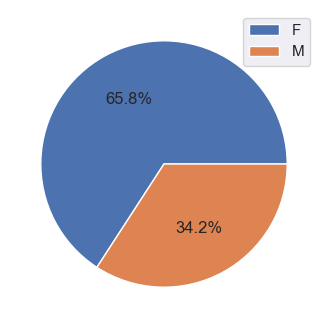

In [61]:
#plotting pie chart
plt.figure(figsize=(4,4))
plt.pie(df_app.CODE_GENDER.value_counts(), autopct='%1.1f%%')
plt.legend(df_app.CODE_GENDER.value_counts().index,loc="upper right" )
plt.show()

In [62]:
# Checking the Organization column second,

df_app.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [63]:
# Let's try to remove all the XNA present in the organization type column

df_app = df_app.drop(df_app.loc[df_app['ORGANIZATION_TYPE']=='XNA'].index)

In [64]:
# Confirmation of the Organization column

df_app.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

## Binning the income from 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [65]:
# Creating bins for the Income column i.e. "AMT_INCOME_TOTAL"

bins_income = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]

slot_income = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df_app['AMT_INCOME_RANGE'] = pd.cut(df_app['AMT_INCOME_TOTAL'], bins_income, labels=slot_income)

In [66]:
# Creating bins for the Credit column i.e. "AMT_CREDIT"

bins_credit = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]

slots_credit = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df_app['AMT_CREDIT_RANGE']=pd.cut(df_app['AMT_CREDIT'], bins_credit, labels=slots_credit)

## Data Imbalance

In [67]:
df_col = pd.read_csv('columns_description.csv', sep=",", encoding='cp1252', index_col=[0])

In [68]:
#Checking the description to understand the exact meaning of 1 and 0 in TARGET column

TARGET = 'TARGET'
target_row = df_col[df_col['Row'] == TARGET]
row_description = target_row['Description'].iloc[0]
print(row_description)

Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)


In [69]:
# Have a look into the TARGET data,

df_app.TARGET.value_counts()

0    230302
1     21835
Name: TARGET, dtype: int64

##### 'Target = 0' means the people those who are non-defaulters (he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample)
##### 'Target=1' means the people those who are defaulters (all other cases).

In [70]:
#checking for data imbalance on the Target Column

df_app.TARGET.value_counts(normalize=True)*100

0    91.340025
1     8.659975
Name: TARGET, dtype: float64

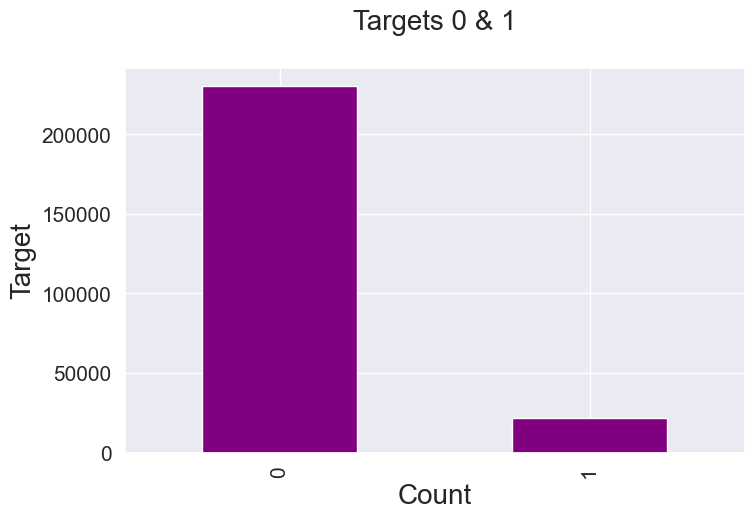

In [71]:
# Plotting for the Targets,

plt.figure(figsize=[8,5])

df_app.TARGET.value_counts().plot.bar(color='Purple')

plt.title('Targets 0 & 1\n', fontsize=20)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Target', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

#### Let us check the ratio.

In [72]:
#calculating ratio 

target_0 = df_app.loc[df_app["TARGET"]==0]
target_1 = df_app.loc[df_app["TARGET"]==1]

round(len(target_0)/len(target_1),2)

10.55

## Univariate Analysis

### Plotting a bar chart for those having no difficulties in re-paying the loan i.e. the Target = 0 people.

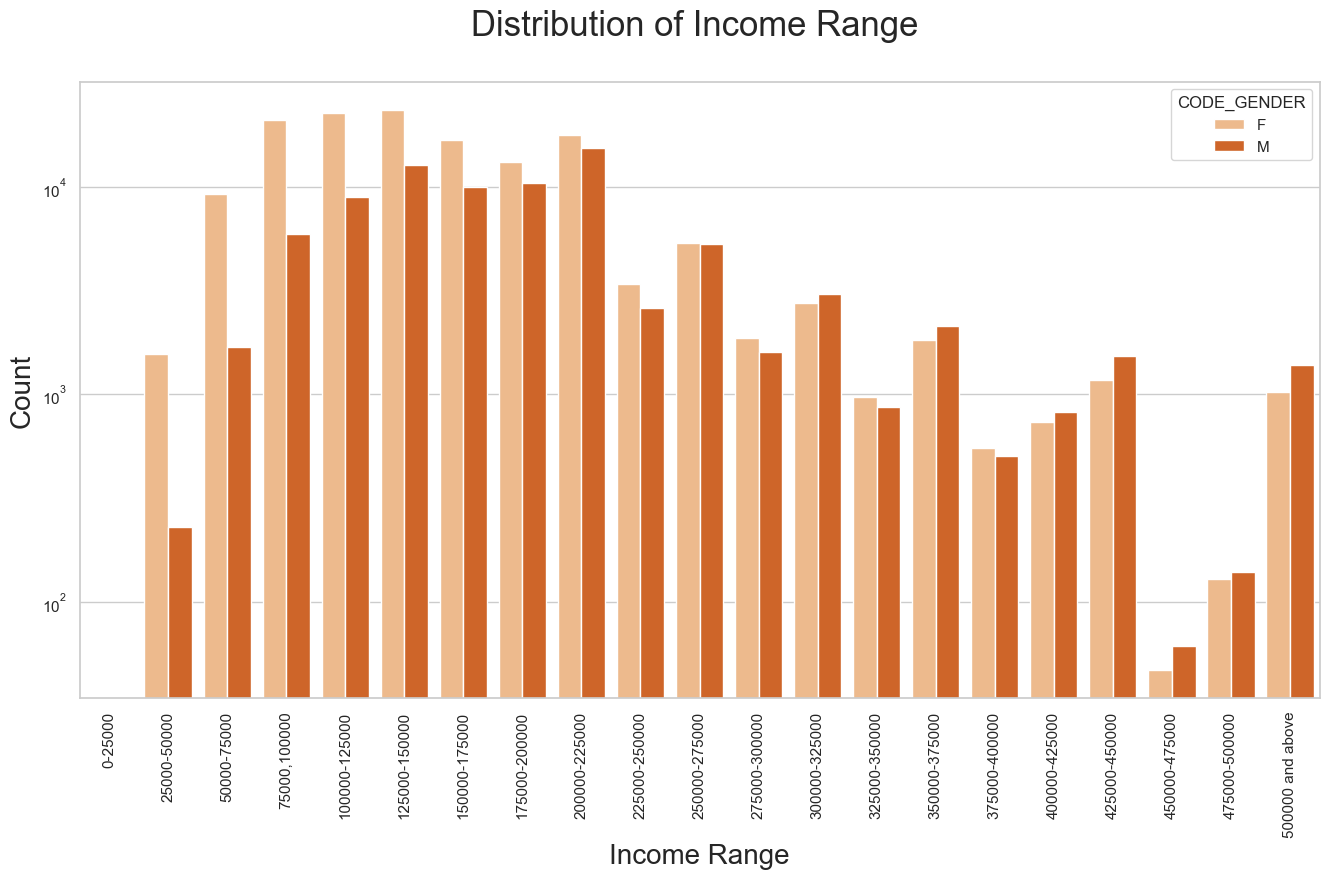

In [73]:
# Plotting for Income Range across Gender.

plt.figure(figsize=[16,8])
sns.set_style('whitegrid')

sns.countplot(data=target_0, x='AMT_INCOME_RANGE', hue='CODE_GENDER', palette='Oranges')

plt.xticks(rotation=90)
plt.title('Distribution of Income Range \n', fontsize=25)
plt.xlabel('Income Range', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.yscale('log')

plt.show()

##### Conclusion from the graph:

> 1. Income range from 125000 to 150000 is having the highest number of credits. <br>
> 2. Least number of credits from range 450000-475000. <br>
> 3. It seems that the females are more than male in having credit for range: 125000 to 150000. <br> 

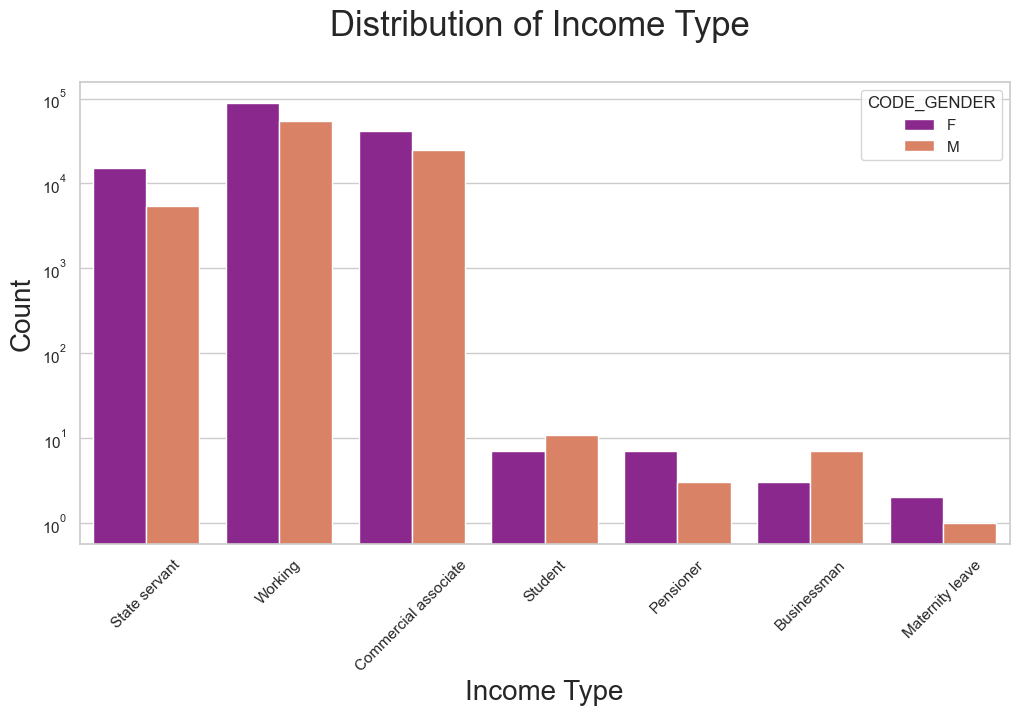

In [74]:
# Plotting for the various Income types across Gender.

plt.figure(figsize=[12,6])
sns.set_style('whitegrid')

sns.countplot(data=target_0, x='NAME_INCOME_TYPE', hue='CODE_GENDER', palette='plasma')

plt.xticks(rotation=45)
plt.title('Distribution of Income Type \n', fontsize=25)
plt.xlabel('Income Type', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.yscale('log')

plt.show()

##### Conclusion from the graph:

> 1. 'Working' Women appear to have more credit than others. <br>
> 2. 'State Servant', 'Working' and 'Commercial Associate' appear to have higher credit counts than the others. <br>
> 3.  Women in 'Maternity leave' has less credit in comparison to others. <br> 

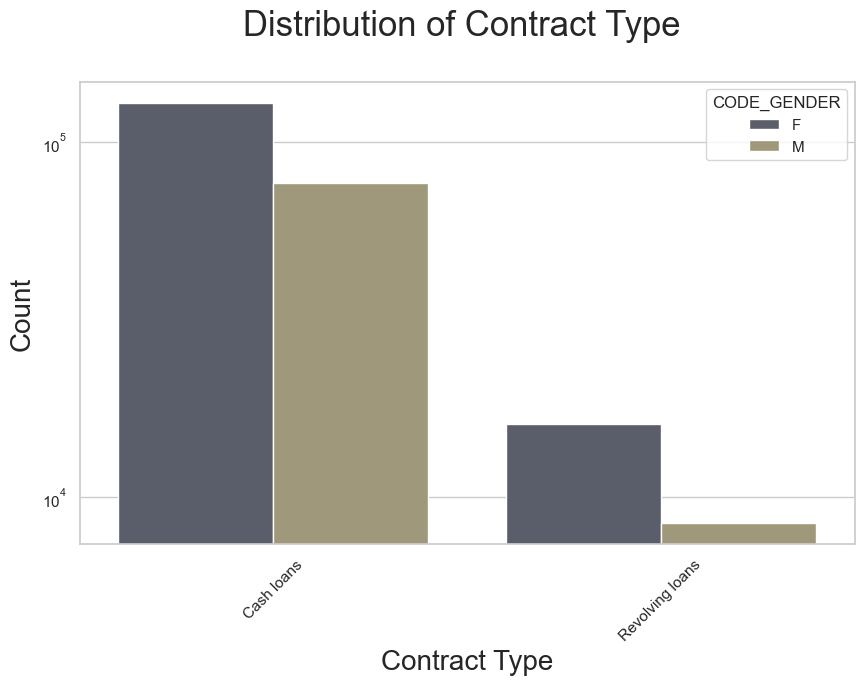

In [75]:
# Plotting for the Contract type across Genders.

plt.figure(figsize=[10,6])
sns.set_style('whitegrid')

sns.countplot(data=target_0, x='NAME_CONTRACT_TYPE', hue='CODE_GENDER', palette='cividis')

plt.xticks(rotation=45)
plt.title('Distribution of Contract Type \n', fontsize=25)
plt.xlabel('Contract Type', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.yscale('log')

plt.show()

##### Conclusion from the graph:

> 1. It appears that the contract type for 'cash loans' has more credits than the contract type for 'revolving loans' <br>
> 2. In addition, Female apply more for Credit.


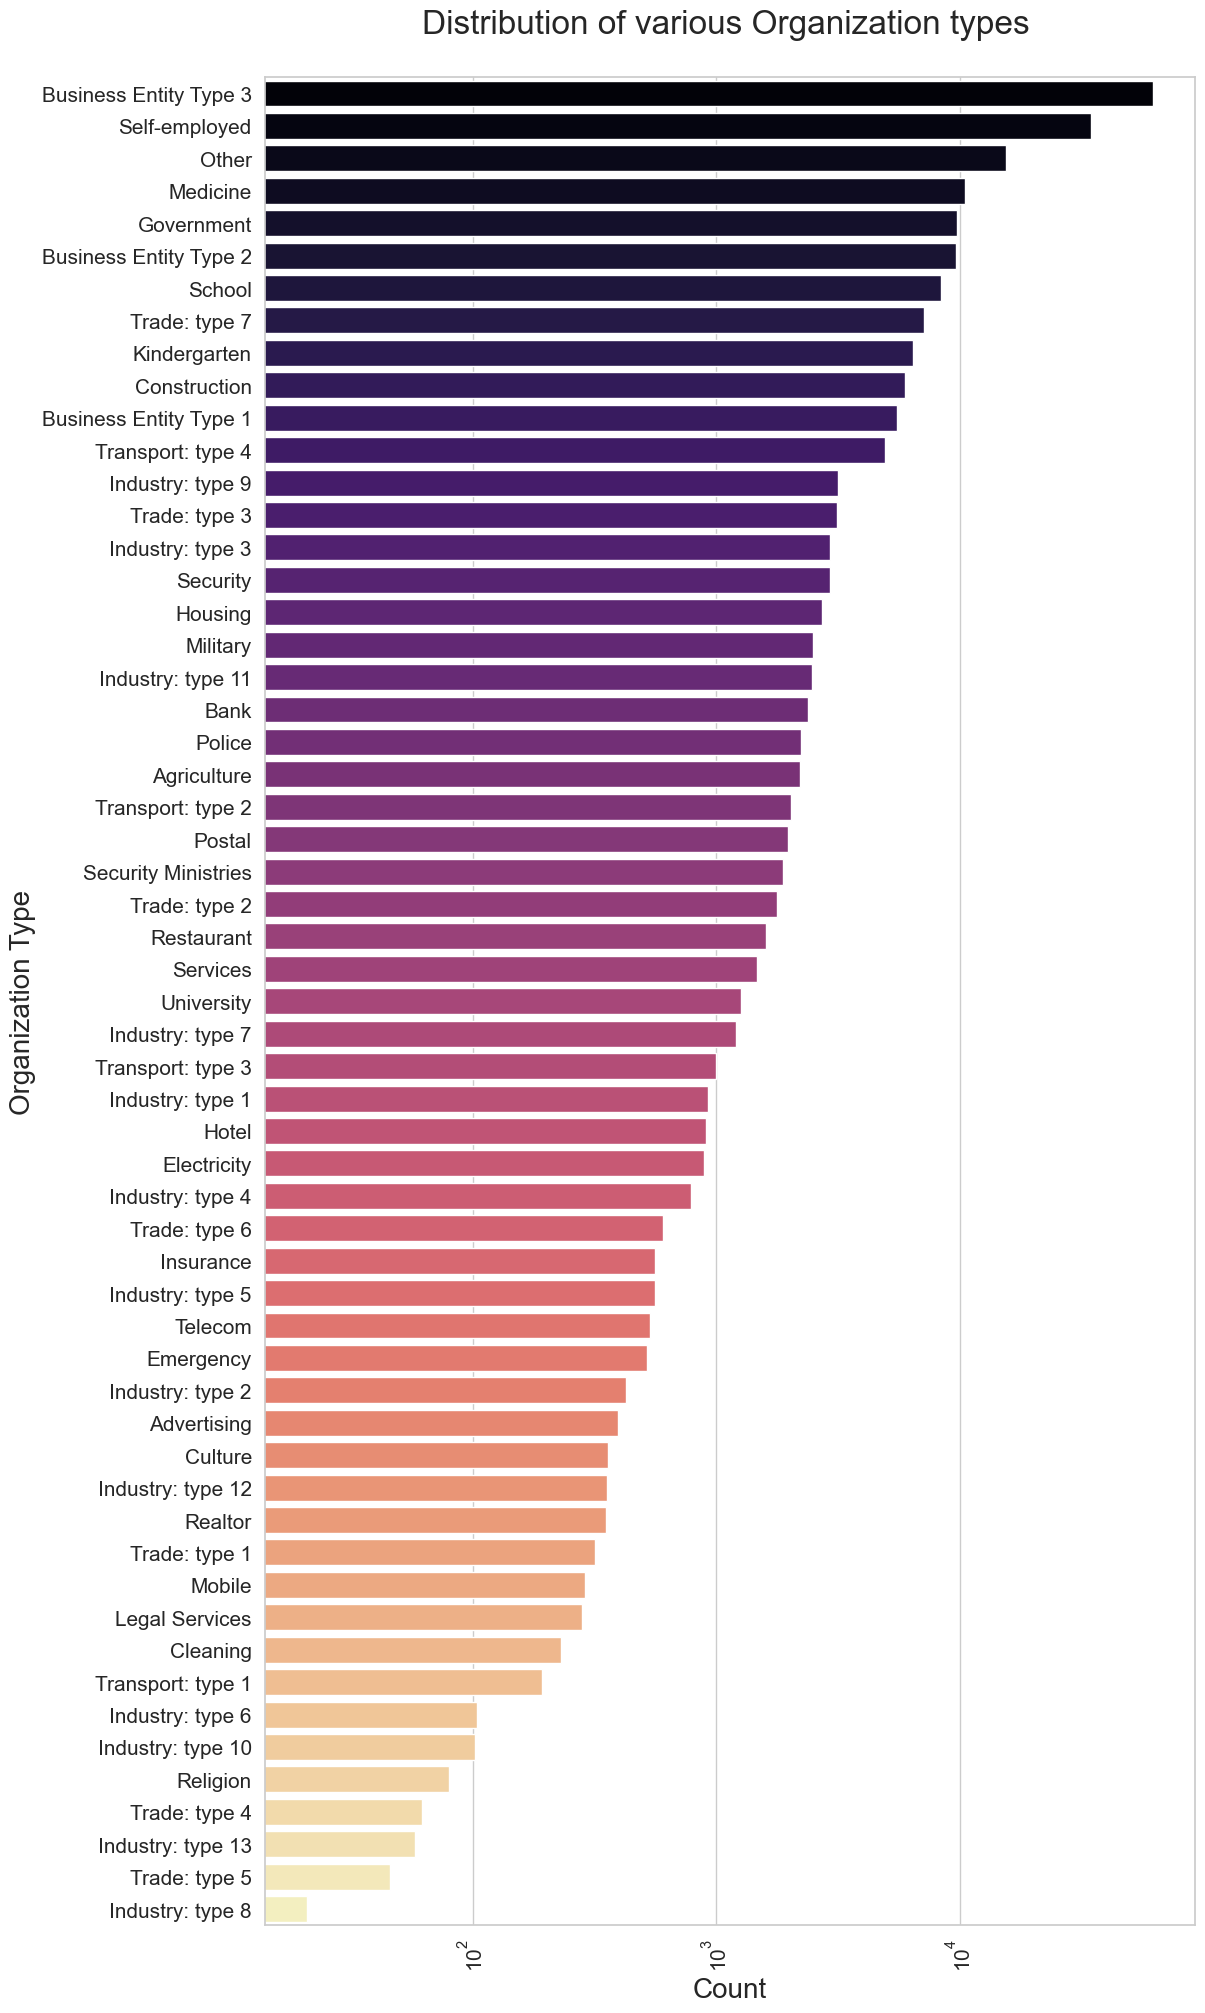

In [76]:
# Plotting for the various Organization Types

plt.figure(figsize=[12, 24])

sns.countplot(data=target_0, y='ORGANIZATION_TYPE', order=target_0['ORGANIZATION_TYPE'].value_counts().index, palette='magma')

plt.title("Distribution of various Organization types \n", fontsize=24)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xscale('log')
plt.xlabel('Count', fontsize=20)
plt.ylabel('Organization Type', fontsize=20)

plt.show()

##### Conclusions from the graph:

> 1. The majority of the clients who have requested credit are from the organisation types 'Business entity Type 3' , 'Self employed' , 'Other' and 'Medicine'. <br>
> 2. Less clients are from 'Industry type 6' , 'Industry type 10' , 'Industry type 13' , 'Industry type 8' , 'Religion' , 'Trade type 4' , ' Trade type 5'. <br>

### Plotting for those having difficulty in re-paying the loan i.e. Target = 1 people. 

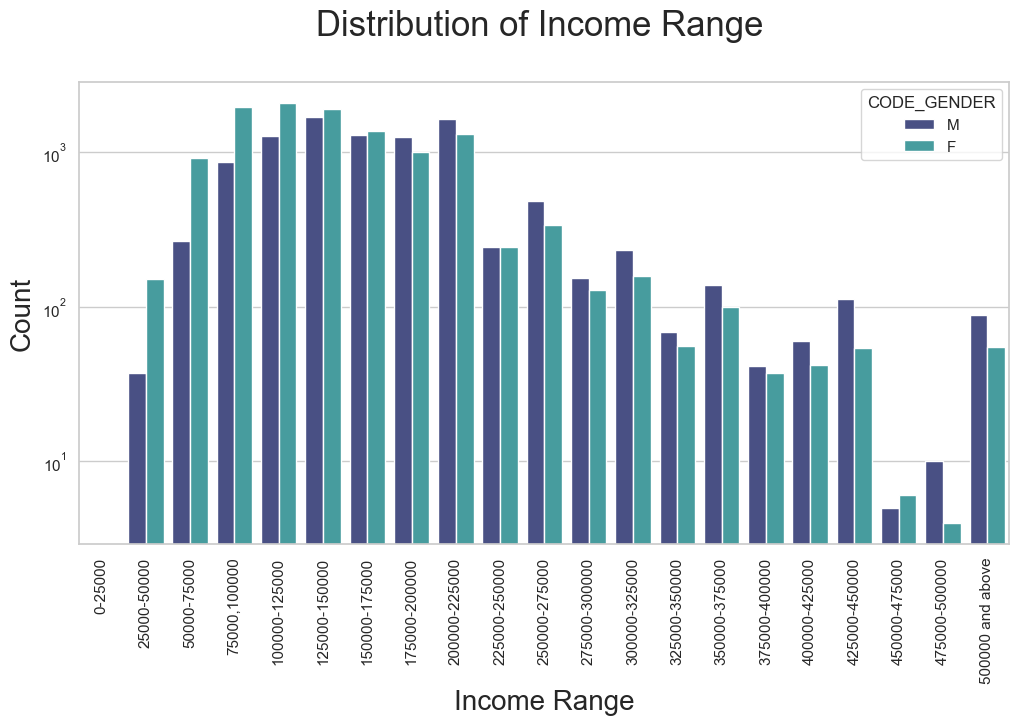

In [77]:
# Plotting for Income Range across Gender.

plt.figure(figsize=[12,6])
sns.set_style('whitegrid')

sns.countplot(data=target_1, x='AMT_INCOME_RANGE', hue='CODE_GENDER', palette='mako')

plt.xticks(rotation=90)
plt.title('Distribution of Income Range \n', fontsize=25)
plt.xlabel('Income Range', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.yscale('log')

plt.show()

##### Conclusions from the graph:

> 1. The number of Male Counts is higher. <br>
> 2. Income range between 100000 to 200000 is having more number of credits as compared to others. <br>
> 3. Less count for income range between 450000-475000.

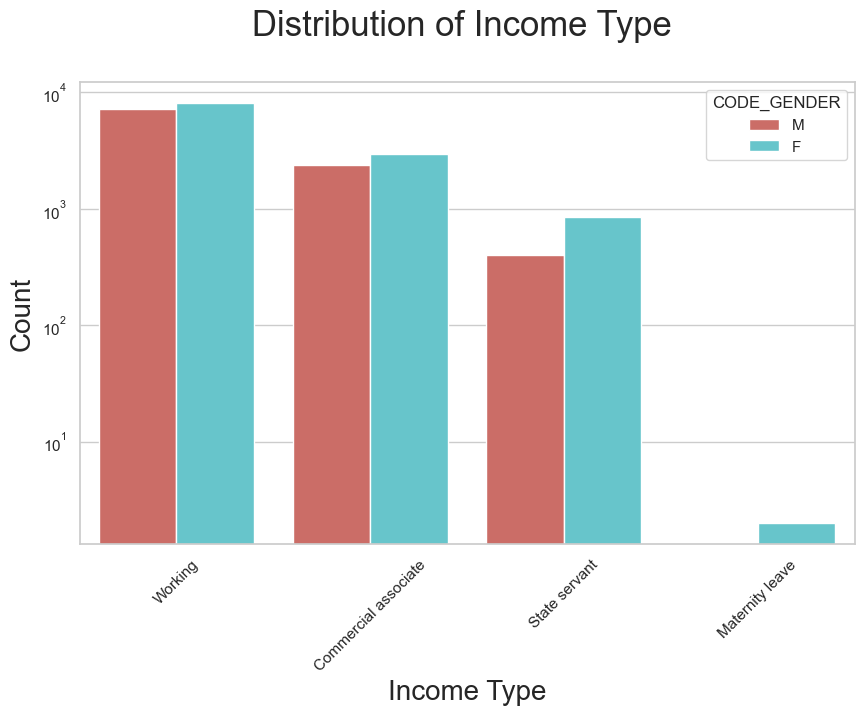

In [78]:
# Plotting for the various Income types across Gender.

plt.figure(figsize=[10,6])
sns.set_style('whitegrid')

sns.countplot(data=target_1, x='NAME_INCOME_TYPE', hue='CODE_GENDER', palette='hls')

plt.xticks(rotation=45)
plt.title('Distribution of Income Type \n', fontsize=25)
plt.xlabel('Income Type', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.yscale('log')

plt.show()

##### Conclusions from the graph:

> 1. The number of credits is higher for income types such as ‘working’, ’commercial associate’, and ‘State Servant’ than other i.e. ‘Maternity leave'. <br>
> 2. In this Females are having more number of credits than male. <br>
> 3. Income type ‘Maternity leave’ have less number of credits. <br>

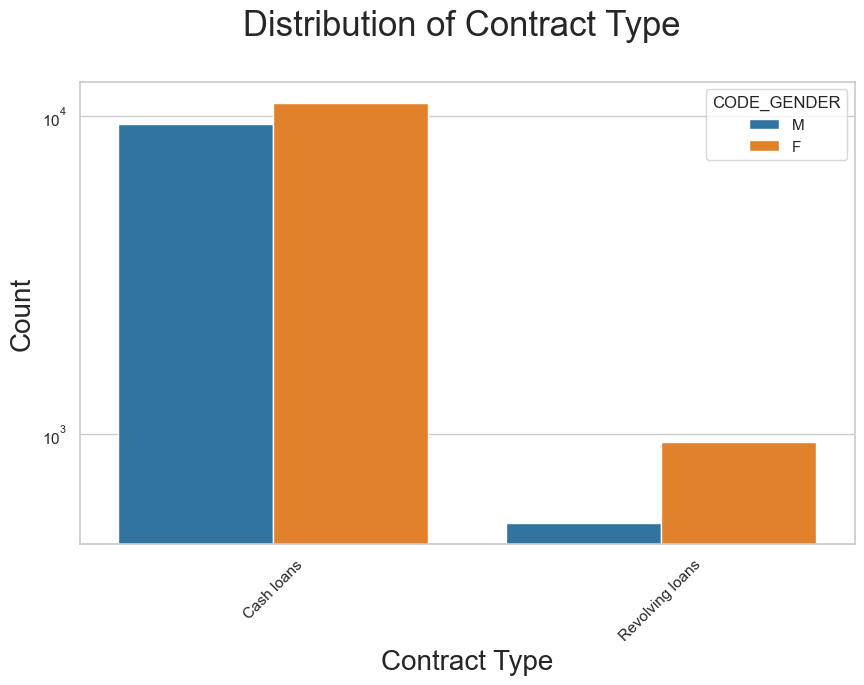

In [79]:
# Plotting for the Contract type across Genders.

plt.figure(figsize=[10,6])
sns.set_style('whitegrid')

sns.countplot(data=target_1, x='NAME_CONTRACT_TYPE', hue='CODE_GENDER', palette='tab10')

plt.xticks(rotation=45)
plt.title('Distribution of Contract Type \n', fontsize=25)
plt.xlabel('Contract Type', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.yscale('log')

plt.show()

##### Conclusions from the graph:

> 1. 'Cash loans' contract type, have a greater number of credits than 'Revolving loans'. <br>
> 2. In addition, Females are leading for applying credits.

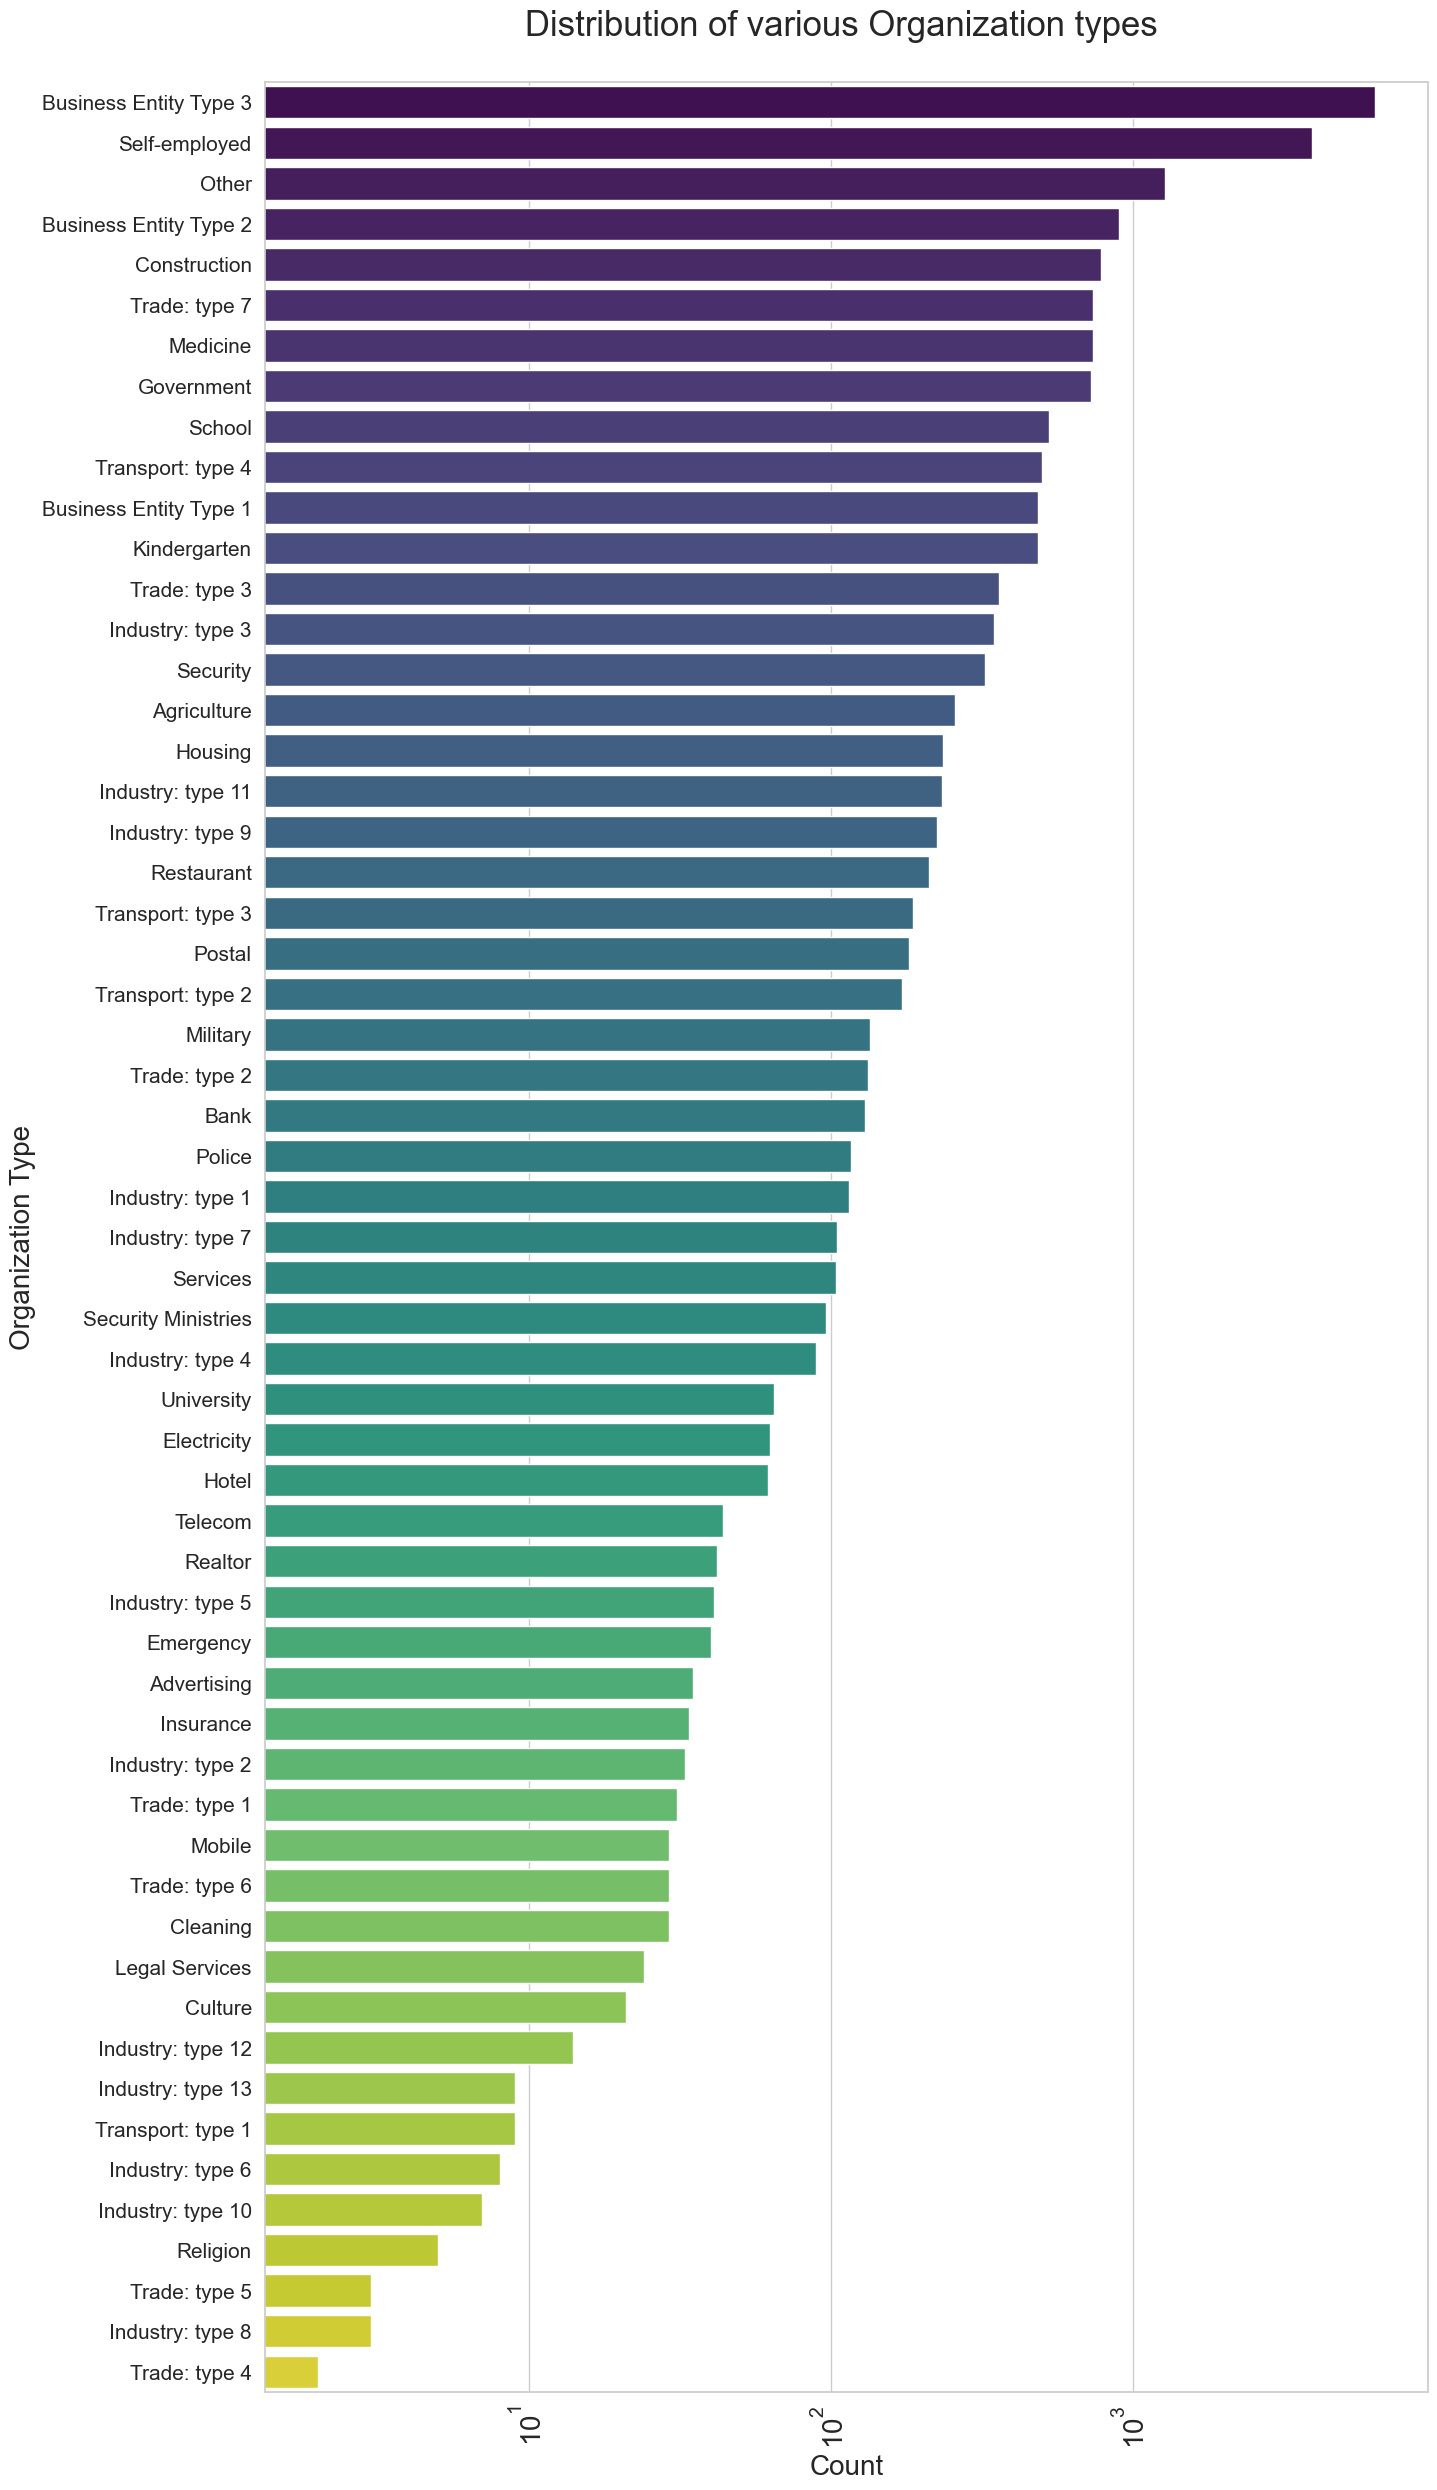

In [80]:
# Plotting for the various Organization Types

plt.figure(figsize=[15, 30])

sns.countplot(data=target_1, y='ORGANIZATION_TYPE', order=target_1['ORGANIZATION_TYPE'].value_counts().index, palette='viridis')

plt.title("Distribution of various Organization types \n", fontsize=25)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=15)
plt.xscale('log')
plt.xlabel('Count', fontsize=20)
plt.ylabel('Organization Type', fontsize=20)

plt.show()

##### Conclusions from the graph:

> 1. The majority of the clients who have requested credit are from the organisation types 'Business entity Type 3' , 'Self employed' , 'Other' and 'Medicine'. <br>
> 2. Less clients are from 'Industry type 6' , 'Industry type 10' , 'Industry type 8' , 'Religion' , 'Trade type 4' , ' Trade type 5'. 
> 3. Same as in distribution of organization type. <br>

## Defining the Correlation

In [81]:
# Calculating the correlation among the target_0 people

target_0_corr = target_0.iloc[0:, 2:].corr()
target_0_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_IN_YEARS,EMPLOYMENT_YEARS,REGISTRATION_YEARS,YEARS_ID_PUBLISH,LAST_PHONE_CHANGE_YEARS
CNT_CHILDREN,1.000000,-0.009826,-0.018704,-0.007612,-0.022277,-0.030352,0.893276,-0.033031,-0.023033,-0.016798,-0.006946,-0.001566,0.010369,0.018414,-0.026134,0.019388,0.003419,0.019062,0.002384,-0.001019,0.000660,0.000047,-0.017476,-0.000453,-0.020784,-0.242343,-0.063027,-0.162696,0.117277,0.002533
AMT_INCOME_TOTAL,-0.009826,1.000000,0.326155,0.400752,0.333217,0.169306,-0.003133,0.055934,0.064868,0.129765,0.121288,-0.004264,-0.020260,-0.011238,0.137752,-0.030661,-0.027914,-0.030477,-0.027415,0.002664,0.009039,0.009068,0.054560,0.016234,0.038459,0.045514,0.030355,-0.034560,0.026408,0.033924
AMT_CREDIT,-0.018704,0.326155,1.000000,0.762103,0.986315,0.103876,0.036760,0.040390,0.020979,0.050597,0.052028,-0.037527,-0.038517,-0.014834,0.136033,-0.003803,-0.022223,-0.003770,-0.024255,-0.002694,0.006213,0.000279,0.054174,0.022967,-0.027913,0.152643,0.087631,0.015152,0.034713,0.068379
AMT_ANNUITY,-0.007612,0.400752,0.762103,1.000000,0.766464,0.122206,0.041231,0.034038,0.039753,0.076045,0.071623,-0.018912,-0.028971,-0.014268,0.126979,-0.016426,-0.023286,-0.016241,-0.024129,0.003876,0.003148,0.013904,0.033052,0.014217,-0.001546,0.091596,0.052797,-0.009854,0.025931,0.060261
AMT_GOODS_PRICE,-0.022277,0.333217,0.986315,0.766464,1.000000,0.106988,0.034889,0.049964,0.023522,0.052040,0.052319,-0.036935,-0.039240,-0.015803,0.142436,-0.003960,-0.023445,-0.003970,-0.025066,-0.002259,0.006563,0.000791,0.055770,0.023351,-0.030615,0.146739,0.088720,0.011817,0.036471,0.070290
REGION_POPULATION_RELATIVE,-0.030352,0.169306,0.103876,0.122206,0.106988,1.000000,-0.028813,0.174754,-0.003262,0.065822,0.092300,-0.053687,-0.049449,-0.017033,0.207116,-0.013763,0.005047,-0.013241,0.000658,-0.001447,0.001957,-0.003770,0.074797,-0.002376,-0.003650,0.041039,-0.008795,0.059607,0.004138,0.043091
CNT_FAM_MEMBERS,0.893276,-0.003133,0.036760,0.041231,0.034889,-0.028813,1.000000,-0.036576,-0.027397,-0.021705,-0.009412,-0.009021,0.013098,0.028997,-0.009935,0.027233,0.001615,0.026951,-0.000868,-0.000424,0.000022,0.002088,-0.014492,0.004167,-0.006863,-0.177902,-0.031468,-0.155458,0.109516,0.025281
HOUR_APPR_PROCESS_START,-0.033031,0.055934,0.040390,0.034038,0.049964,0.174754,-0.036576,1.000000,0.055041,0.072118,0.057690,0.010767,-0.001460,-0.005077,0.152609,-0.007200,-0.005166,-0.007076,-0.007545,-0.012937,0.004305,-0.002169,0.032295,0.002783,-0.020408,-0.048694,-0.022261,0.031412,-0.005534,0.008591
REG_REGION_NOT_LIVE_REGION,-0.023033,0.064868,0.020979,0.039753,0.023522,-0.003262,-0.027397,0.055041,1.000000,0.461596,0.090193,0.342321,0.142429,0.003479,0.015527,-0.021536,-0.008774,-0.021512,-0.008618,-0.001441,-0.000889,-0.000262,-0.004340,-0.003524,-0.020620,-0.058286,-0.056708,-0.020490,-0.026584,-0.043522
REG_REGION_NOT_WORK_REGION,-0.016798,0.129765,0.050597,0.076045,0.052040,0.065822,-0.021705,0.072118,0.461596,1.000000,0.860421,0.148476,0.220372,0.178472,0.032450,-0.030404,-0.017862,-0.030525,-0.017958,-0.002754,-0.002249,-0.000817,0.002483,-0.005032,-0.021199,-0.039199,-0.082220,-0.017511,-0.020888,-0.043330


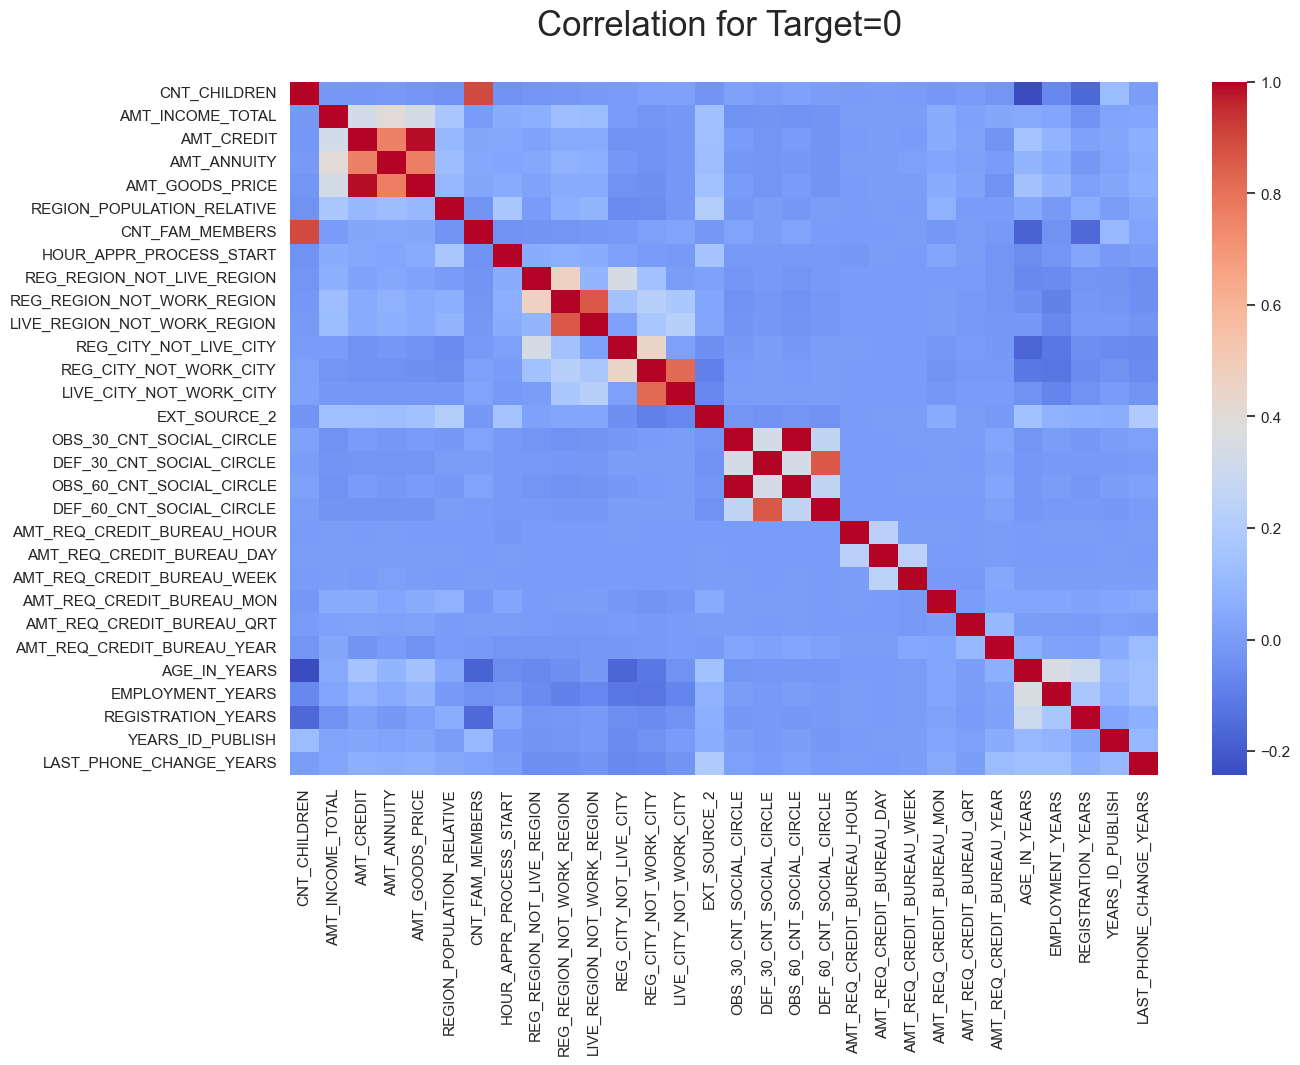

In [82]:
# Plotting the correlation for the Target_0.

plt.figure(figsize=[14,9])
sns.heatmap(target_0_corr, annot=False, cmap='coolwarm')
plt.title('Correlation for Target=0 \n', fontsize=25)
plt.show()

##### Conclusions from the graph:

1. Credit amount and birthdate are inversely related, credit amount is higher for younger people and vice versa.
2. The quantity of credit is inversely correlated with the number of children a client has, therefore the amount of credit is larger when the client has fewer children and vice versa.
3. The quantity of income is inversely correlated with the number of children a customer has, therefore a client with fewer children will have more income than a client with more children.
4. In a densly populated location, clients have fewer children.
5. Credit amount is given in greater amounts to heavily inhabited areas.
6. In areas with high population density, income is also higher.



In [83]:
# Calculating the correlation among the target_1 people

target_1_corr = target_1.iloc[0:, 2:].corr()
target_1_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_IN_YEARS,EMPLOYMENT_YEARS,REGISTRATION_YEARS,YEARS_ID_PUBLISH,LAST_PHONE_CHANGE_YEARS
CNT_CHILDREN,1.000000,0.001872,-0.002074,0.015653,-0.007707,-0.032019,0.893829,-0.038923,-0.032465,-0.039498,-0.028031,-0.019278,-0.000876,0.016332,-0.010600,0.028712,0.002959,0.027955,-0.003220,-0.001269,-0.008695,-0.006195,-0.015163,-0.011841,-0.015698,-0.176366,-0.032456,-0.126680,0.090187,-0.012283
AMT_INCOME_TOTAL,0.001872,1.000000,0.036484,0.043358,0.036086,0.008476,0.003692,0.012520,0.006951,0.013245,0.012287,-0.003664,-0.006886,-0.004401,0.006201,-0.005866,-0.005849,-0.005765,-0.005282,0.000925,-0.000071,0.000885,0.005141,0.000607,0.005657,0.008080,0.000732,0.004308,0.008853,0.001127
AMT_CREDIT,-0.002074,0.036484,1.000000,0.748708,0.982239,0.069220,0.045420,0.029054,0.020083,0.035695,0.035966,-0.035325,-0.041392,-0.017875,0.126885,0.015835,-0.031869,0.016319,-0.035170,-0.005051,-0.000943,0.013307,0.061456,-0.003275,-0.008383,0.189458,0.106075,0.033248,0.062238,0.113834
AMT_ANNUITY,0.015653,0.043358,0.748708,1.000000,0.748651,0.074406,0.054884,0.022524,0.033311,0.063242,0.061609,-0.013834,-0.019728,-0.006806,0.120642,-0.000018,-0.024644,0.001216,-0.027918,0.010425,-0.001406,0.034566,0.051267,-0.002792,-0.003192,0.090384,0.049279,-0.014301,0.044123,0.082882
AMT_GOODS_PRICE,-0.007707,0.036086,0.982239,0.748651,1.000000,0.076210,0.042147,0.042280,0.023532,0.039387,0.038453,-0.035652,-0.041491,-0.017052,0.137716,0.016710,-0.027045,0.017255,-0.029544,-0.004194,0.000755,0.015111,0.064831,-0.002224,-0.011406,0.185367,0.112162,0.032018,0.064377,0.120838
REGION_POPULATION_RELATIVE,-0.032019,0.008476,0.069220,0.074406,0.076210,1.000000,-0.030847,0.144049,-0.021946,0.025422,0.050773,-0.060398,-0.053718,-0.019017,0.170162,0.004513,0.023877,0.004907,0.015341,0.000885,-0.001070,0.007411,0.067029,-0.002863,0.004887,0.050143,0.016518,0.055690,0.012508,0.052883
CNT_FAM_MEMBERS,0.893829,0.003692,0.045420,0.054884,0.042147,-0.030847,1.000000,-0.040184,-0.034419,-0.045532,-0.033116,-0.023800,0.000693,0.026055,0.003175,0.046488,0.009694,0.045658,0.002416,-0.001114,-0.011626,-0.004615,-0.009246,-0.003155,0.011511,-0.110169,0.001895,-0.124067,0.088599,0.012356
HOUR_APPR_PROCESS_START,-0.038923,0.012520,0.029054,0.022524,0.042280,0.144049,-0.040184,1.000000,0.054819,0.067472,0.051844,0.005148,0.005293,0.003297,0.129745,-0.012621,0.002996,-0.012103,0.000901,-0.013118,-0.008218,-0.002095,0.037477,0.005615,-0.013681,-0.034625,-0.000030,0.048380,-0.008291,0.017539
REG_REGION_NOT_LIVE_REGION,-0.032465,0.006951,0.020083,0.033311,0.023532,-0.021946,-0.034419,0.054819,1.000000,0.506747,0.068368,0.322030,0.150968,-0.013946,0.013417,-0.032665,0.002201,-0.032459,0.001449,-0.010111,-0.005538,-0.006724,0.018713,0.001405,-0.026616,-0.044492,-0.059146,-0.010703,-0.025481,-0.035877
REG_REGION_NOT_WORK_REGION,-0.039498,0.013245,0.035695,0.063242,0.039387,0.025422,-0.045532,0.067472,0.506747,1.000000,0.846872,0.141416,0.224370,0.181231,0.022785,-0.041830,-0.016470,-0.041636,-0.014281,-0.002248,-0.000553,-0.007032,0.009737,-0.005282,-0.023100,-0.022130,-0.075279,-0.004565,-0.013221,-0.038468


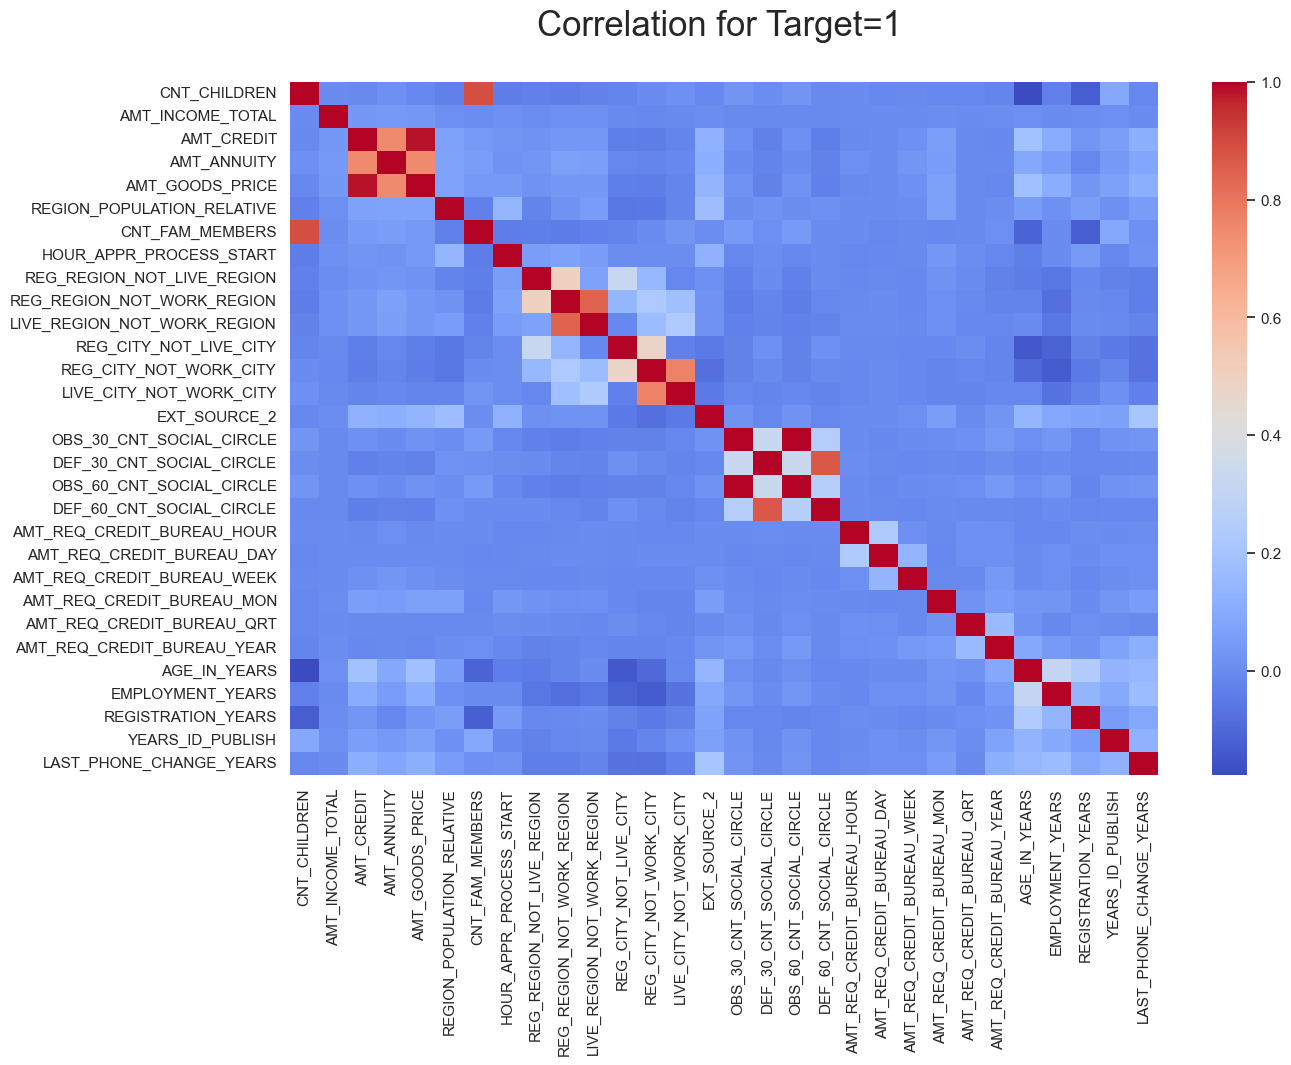

In [84]:
# Plotting the correlation for the Target_1.

plt.figure(figsize=[14, 9])
sns.heatmap(target_1_corr, annot=False, cmap='coolwarm')
plt.title('Correlation for Target=1 \n', fontsize=25)
plt.show()

##### Conclusions from the graph:

> Same like the target=0 heatmap above, adding some other points from this heatmap.
1. The client's whose permanent address does not match contact address are having less children and vice-versa.
2. The client's whose permanent address does not match work address are having less children and vice-versa.

## Finding the top 10 correlations for Target 0 and Target 1

In [85]:
# Finding the top 10 correlations for Target = 0.

target_0_corr = target_0.iloc[0:, 2:].corr()
target_0_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_IN_YEARS,EMPLOYMENT_YEARS,REGISTRATION_YEARS,YEARS_ID_PUBLISH,LAST_PHONE_CHANGE_YEARS
CNT_CHILDREN,1.000000,-0.009826,-0.018704,-0.007612,-0.022277,-0.030352,0.893276,-0.033031,-0.023033,-0.016798,-0.006946,-0.001566,0.010369,0.018414,-0.026134,0.019388,0.003419,0.019062,0.002384,-0.001019,0.000660,0.000047,-0.017476,-0.000453,-0.020784,-0.242343,-0.063027,-0.162696,0.117277,0.002533
AMT_INCOME_TOTAL,-0.009826,1.000000,0.326155,0.400752,0.333217,0.169306,-0.003133,0.055934,0.064868,0.129765,0.121288,-0.004264,-0.020260,-0.011238,0.137752,-0.030661,-0.027914,-0.030477,-0.027415,0.002664,0.009039,0.009068,0.054560,0.016234,0.038459,0.045514,0.030355,-0.034560,0.026408,0.033924
AMT_CREDIT,-0.018704,0.326155,1.000000,0.762103,0.986315,0.103876,0.036760,0.040390,0.020979,0.050597,0.052028,-0.037527,-0.038517,-0.014834,0.136033,-0.003803,-0.022223,-0.003770,-0.024255,-0.002694,0.006213,0.000279,0.054174,0.022967,-0.027913,0.152643,0.087631,0.015152,0.034713,0.068379
AMT_ANNUITY,-0.007612,0.400752,0.762103,1.000000,0.766464,0.122206,0.041231,0.034038,0.039753,0.076045,0.071623,-0.018912,-0.028971,-0.014268,0.126979,-0.016426,-0.023286,-0.016241,-0.024129,0.003876,0.003148,0.013904,0.033052,0.014217,-0.001546,0.091596,0.052797,-0.009854,0.025931,0.060261
AMT_GOODS_PRICE,-0.022277,0.333217,0.986315,0.766464,1.000000,0.106988,0.034889,0.049964,0.023522,0.052040,0.052319,-0.036935,-0.039240,-0.015803,0.142436,-0.003960,-0.023445,-0.003970,-0.025066,-0.002259,0.006563,0.000791,0.055770,0.023351,-0.030615,0.146739,0.088720,0.011817,0.036471,0.070290
REGION_POPULATION_RELATIVE,-0.030352,0.169306,0.103876,0.122206,0.106988,1.000000,-0.028813,0.174754,-0.003262,0.065822,0.092300,-0.053687,-0.049449,-0.017033,0.207116,-0.013763,0.005047,-0.013241,0.000658,-0.001447,0.001957,-0.003770,0.074797,-0.002376,-0.003650,0.041039,-0.008795,0.059607,0.004138,0.043091
CNT_FAM_MEMBERS,0.893276,-0.003133,0.036760,0.041231,0.034889,-0.028813,1.000000,-0.036576,-0.027397,-0.021705,-0.009412,-0.009021,0.013098,0.028997,-0.009935,0.027233,0.001615,0.026951,-0.000868,-0.000424,0.000022,0.002088,-0.014492,0.004167,-0.006863,-0.177902,-0.031468,-0.155458,0.109516,0.025281
HOUR_APPR_PROCESS_START,-0.033031,0.055934,0.040390,0.034038,0.049964,0.174754,-0.036576,1.000000,0.055041,0.072118,0.057690,0.010767,-0.001460,-0.005077,0.152609,-0.007200,-0.005166,-0.007076,-0.007545,-0.012937,0.004305,-0.002169,0.032295,0.002783,-0.020408,-0.048694,-0.022261,0.031412,-0.005534,0.008591
REG_REGION_NOT_LIVE_REGION,-0.023033,0.064868,0.020979,0.039753,0.023522,-0.003262,-0.027397,0.055041,1.000000,0.461596,0.090193,0.342321,0.142429,0.003479,0.015527,-0.021536,-0.008774,-0.021512,-0.008618,-0.001441,-0.000889,-0.000262,-0.004340,-0.003524,-0.020620,-0.058286,-0.056708,-0.020490,-0.026584,-0.043522
REG_REGION_NOT_WORK_REGION,-0.016798,0.129765,0.050597,0.076045,0.052040,0.065822,-0.021705,0.072118,0.461596,1.000000,0.860421,0.148476,0.220372,0.178472,0.032450,-0.030404,-0.017862,-0.030525,-0.017958,-0.002754,-0.002249,-0.000817,0.002483,-0.005032,-0.021199,-0.039199,-0.082220,-0.017511,-0.020888,-0.043330


In [86]:
# Converting the negative values to postive values and sorting the value

corr_0 = target_0_corr.abs().unstack().sort_values(kind='quicksort').dropna()
corr_0 = corr_0[corr_0 != 1.0]
corr_0

CNT_FAM_MEMBERS              AMT_REQ_CREDIT_BUREAU_DAY      0.000022
AMT_REQ_CREDIT_BUREAU_DAY    CNT_FAM_MEMBERS                0.000022
LAST_PHONE_CHANGE_YEARS      DEF_30_CNT_SOCIAL_CIRCLE       0.000038
DEF_30_CNT_SOCIAL_CIRCLE     LAST_PHONE_CHANGE_YEARS        0.000038
AMT_REQ_CREDIT_BUREAU_WEEK   CNT_CHILDREN                   0.000047
CNT_CHILDREN                 AMT_REQ_CREDIT_BUREAU_WEEK     0.000047
OBS_60_CNT_SOCIAL_CIRCLE     AMT_REQ_CREDIT_BUREAU_HOUR     0.000071
AMT_REQ_CREDIT_BUREAU_HOUR   OBS_60_CNT_SOCIAL_CIRCLE       0.000071
DEF_60_CNT_SOCIAL_CIRCLE     AMT_REQ_CREDIT_BUREAU_WEEK     0.000095
AMT_REQ_CREDIT_BUREAU_WEEK   DEF_60_CNT_SOCIAL_CIRCLE       0.000095
AMT_REQ_CREDIT_BUREAU_HOUR   OBS_30_CNT_SOCIAL_CIRCLE       0.000204
OBS_30_CNT_SOCIAL_CIRCLE     AMT_REQ_CREDIT_BUREAU_HOUR     0.000204
AMT_REQ_CREDIT_BUREAU_WEEK   DEF_30_CNT_SOCIAL_CIRCLE       0.000210
DEF_30_CNT_SOCIAL_CIRCLE     AMT_REQ_CREDIT_BUREAU_WEEK     0.000210
REG_REGION_NOT_LIVE_REGION   AMT_R

In [87]:
# Top 10 correlation for the Target = 0,

corr_0.tail(10)

REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.860421
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.860421
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.861454
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.861454
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.893276
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.893276
AMT_GOODS_PRICE              AMT_CREDIT                     0.986315
AMT_CREDIT                   AMT_GOODS_PRICE                0.986315
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998491
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998491
dtype: float64

In [88]:
# Finding the top 10 correlations for Target = 1.

target_1_corr = target_1.iloc[0:, 2:].corr()
target_1_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_IN_YEARS,EMPLOYMENT_YEARS,REGISTRATION_YEARS,YEARS_ID_PUBLISH,LAST_PHONE_CHANGE_YEARS
CNT_CHILDREN,1.000000,0.001872,-0.002074,0.015653,-0.007707,-0.032019,0.893829,-0.038923,-0.032465,-0.039498,-0.028031,-0.019278,-0.000876,0.016332,-0.010600,0.028712,0.002959,0.027955,-0.003220,-0.001269,-0.008695,-0.006195,-0.015163,-0.011841,-0.015698,-0.176366,-0.032456,-0.126680,0.090187,-0.012283
AMT_INCOME_TOTAL,0.001872,1.000000,0.036484,0.043358,0.036086,0.008476,0.003692,0.012520,0.006951,0.013245,0.012287,-0.003664,-0.006886,-0.004401,0.006201,-0.005866,-0.005849,-0.005765,-0.005282,0.000925,-0.000071,0.000885,0.005141,0.000607,0.005657,0.008080,0.000732,0.004308,0.008853,0.001127
AMT_CREDIT,-0.002074,0.036484,1.000000,0.748708,0.982239,0.069220,0.045420,0.029054,0.020083,0.035695,0.035966,-0.035325,-0.041392,-0.017875,0.126885,0.015835,-0.031869,0.016319,-0.035170,-0.005051,-0.000943,0.013307,0.061456,-0.003275,-0.008383,0.189458,0.106075,0.033248,0.062238,0.113834
AMT_ANNUITY,0.015653,0.043358,0.748708,1.000000,0.748651,0.074406,0.054884,0.022524,0.033311,0.063242,0.061609,-0.013834,-0.019728,-0.006806,0.120642,-0.000018,-0.024644,0.001216,-0.027918,0.010425,-0.001406,0.034566,0.051267,-0.002792,-0.003192,0.090384,0.049279,-0.014301,0.044123,0.082882
AMT_GOODS_PRICE,-0.007707,0.036086,0.982239,0.748651,1.000000,0.076210,0.042147,0.042280,0.023532,0.039387,0.038453,-0.035652,-0.041491,-0.017052,0.137716,0.016710,-0.027045,0.017255,-0.029544,-0.004194,0.000755,0.015111,0.064831,-0.002224,-0.011406,0.185367,0.112162,0.032018,0.064377,0.120838
REGION_POPULATION_RELATIVE,-0.032019,0.008476,0.069220,0.074406,0.076210,1.000000,-0.030847,0.144049,-0.021946,0.025422,0.050773,-0.060398,-0.053718,-0.019017,0.170162,0.004513,0.023877,0.004907,0.015341,0.000885,-0.001070,0.007411,0.067029,-0.002863,0.004887,0.050143,0.016518,0.055690,0.012508,0.052883
CNT_FAM_MEMBERS,0.893829,0.003692,0.045420,0.054884,0.042147,-0.030847,1.000000,-0.040184,-0.034419,-0.045532,-0.033116,-0.023800,0.000693,0.026055,0.003175,0.046488,0.009694,0.045658,0.002416,-0.001114,-0.011626,-0.004615,-0.009246,-0.003155,0.011511,-0.110169,0.001895,-0.124067,0.088599,0.012356
HOUR_APPR_PROCESS_START,-0.038923,0.012520,0.029054,0.022524,0.042280,0.144049,-0.040184,1.000000,0.054819,0.067472,0.051844,0.005148,0.005293,0.003297,0.129745,-0.012621,0.002996,-0.012103,0.000901,-0.013118,-0.008218,-0.002095,0.037477,0.005615,-0.013681,-0.034625,-0.000030,0.048380,-0.008291,0.017539
REG_REGION_NOT_LIVE_REGION,-0.032465,0.006951,0.020083,0.033311,0.023532,-0.021946,-0.034419,0.054819,1.000000,0.506747,0.068368,0.322030,0.150968,-0.013946,0.013417,-0.032665,0.002201,-0.032459,0.001449,-0.010111,-0.005538,-0.006724,0.018713,0.001405,-0.026616,-0.044492,-0.059146,-0.010703,-0.025481,-0.035877
REG_REGION_NOT_WORK_REGION,-0.039498,0.013245,0.035695,0.063242,0.039387,0.025422,-0.045532,0.067472,0.506747,1.000000,0.846872,0.141416,0.224370,0.181231,0.022785,-0.041830,-0.016470,-0.041636,-0.014281,-0.002248,-0.000553,-0.007032,0.009737,-0.005282,-0.023100,-0.022130,-0.075279,-0.004565,-0.013221,-0.038468


In [89]:
# Converting the negative values to postive values and sorting the value

corr_1 = target_1_corr.abs().unstack().sort_values(kind='quicksort').dropna()
corr_1 = corr_1[corr_1 != 1.0]
corr_1

AMT_ANNUITY                  OBS_30_CNT_SOCIAL_CIRCLE       0.000018
OBS_30_CNT_SOCIAL_CIRCLE     AMT_ANNUITY                    0.000018
EMPLOYMENT_YEARS             HOUR_APPR_PROCESS_START        0.000030
HOUR_APPR_PROCESS_START      EMPLOYMENT_YEARS               0.000030
AMT_INCOME_TOTAL             AMT_REQ_CREDIT_BUREAU_DAY      0.000071
AMT_REQ_CREDIT_BUREAU_DAY    AMT_INCOME_TOTAL               0.000071
EXT_SOURCE_2                 AMT_REQ_CREDIT_BUREAU_HOUR     0.000129
AMT_REQ_CREDIT_BUREAU_HOUR   EXT_SOURCE_2                   0.000129
AMT_REQ_CREDIT_BUREAU_DAY    LIVE_CITY_NOT_WORK_CITY        0.000279
LIVE_CITY_NOT_WORK_CITY      AMT_REQ_CREDIT_BUREAU_DAY      0.000279
OBS_60_CNT_SOCIAL_CIRCLE     AMT_REQ_CREDIT_BUREAU_HOUR     0.000289
AMT_REQ_CREDIT_BUREAU_HOUR   OBS_60_CNT_SOCIAL_CIRCLE       0.000289
AMT_REQ_CREDIT_BUREAU_DAY    REGISTRATION_YEARS             0.000329
REGISTRATION_YEARS           AMT_REQ_CREDIT_BUREAU_DAY      0.000329
AMT_REQ_CREDIT_BUREAU_DAY    AGE_I

In [90]:
# Top 10 correlation for the Target = 1,

corr_1.tail(10)

LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.846872
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.846872
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.867963
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.867963
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.893829
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.893829
AMT_CREDIT                   AMT_GOODS_PRICE                0.982239
AMT_GOODS_PRICE              AMT_CREDIT                     0.982239
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998288
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998288
dtype: float64

### Bivariate Analysis of the numerical columns

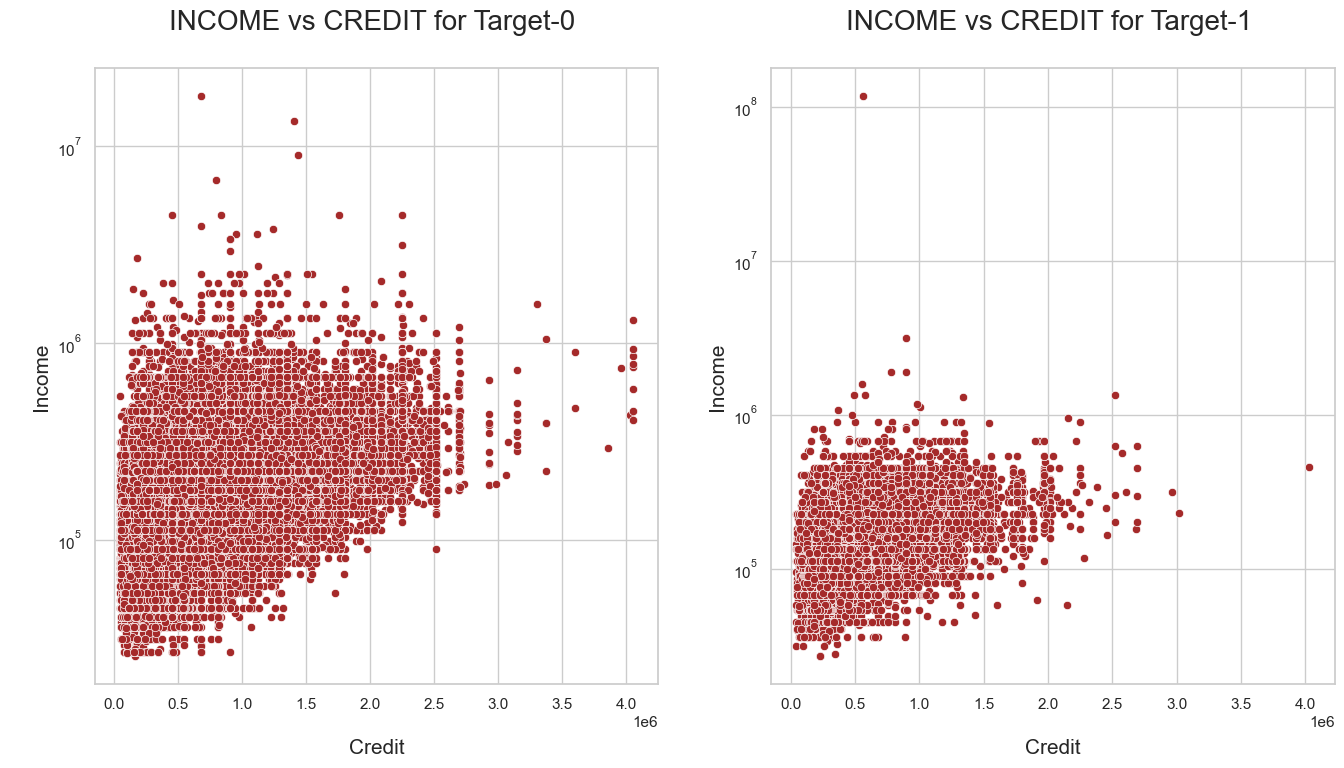

In [91]:
# Plotting scatterplot to find any correlations and to check the trends in the dataset, in logs,

plt.figure(figsize=[16,8])

plt.subplot(1,2,1)
sns.scatterplot(x=target_0.AMT_CREDIT, y=target_0.AMT_INCOME_TOTAL, color='brown')
plt.title('INCOME vs CREDIT for Target-0 \n', fontsize=20)
plt.yscale('log')
plt.xlabel('\nCredit', fontsize=15)
plt.ylabel('\nIncome', fontsize=15)

plt.subplot(1,2,2)
sns.scatterplot(x=target_1.AMT_CREDIT, y=target_1.AMT_INCOME_TOTAL, color='brown')
plt.title('INCOME vs CREDIT for Target-1 \n', fontsize=20)
plt.yscale('log')
plt.xlabel('\nCredit', fontsize=15)
plt.ylabel('\nIncome', fontsize=15)

plt.show()

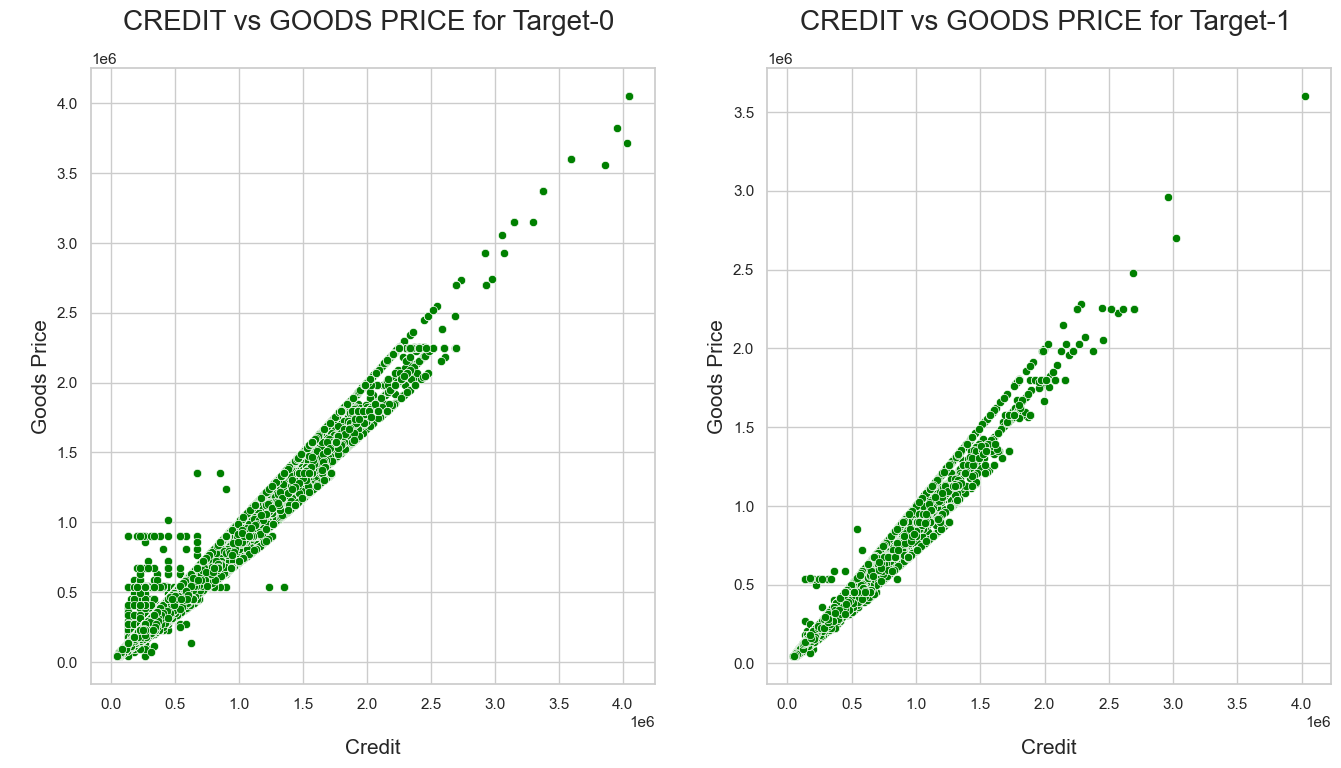

In [92]:
# Plotting scatterplot to find any correlations and to check the trends in the dataset.


plt.figure(figsize=[16,8])

plt.subplot(1,2,1)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=target_0, color='green')
plt.title('CREDIT vs GOODS PRICE for Target-0 \n', fontsize=20)
plt.xlabel('\nCredit', fontsize=15)
plt.ylabel('\nGoods Price', fontsize=15)

plt.subplot(1,2,2)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=target_1, color='green')
plt.title('CREDIT vs GOODS PRICE for Target-1 \n', fontsize=20)
plt.xlabel('\nCredit', fontsize=15)
plt.ylabel('\nGoods Price', fontsize=15)

plt.show()

##### Conclusions from the graph:

>Using the scatter plot, we can see that there is a strong correlation between AMT CREDIT and AMT GOODS PRICE, meaning that when goods prices rise credit also rises and vice versa.

## Finding Outliers

## Univariate Analysis

#### For Target=0 

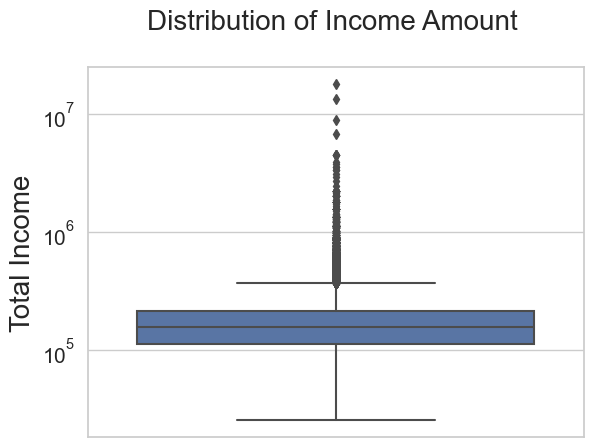

In [93]:
# Distribution of Income Amount,

sns.set_style('whitegrid')

sns.boxplot(data=target_0, y='AMT_INCOME_TOTAL')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Income', fontsize=20)
plt.title('Distribution of Income Amount \n', fontsize=20)

plt.show()

##### Conclusions from the graph:

 
> 1. The clients Income Amounts appears to be equally distributed.
> 2. Also, some outliers are present in the dataset.

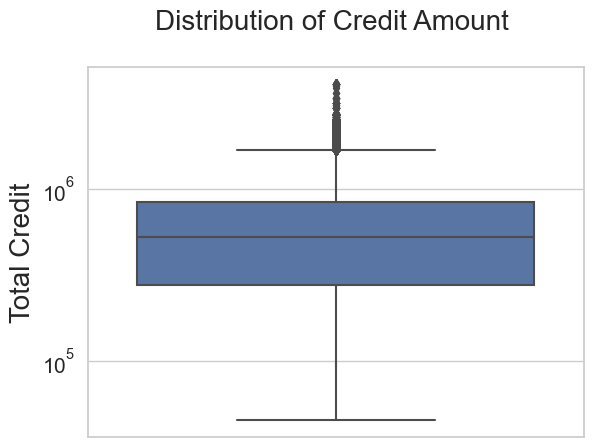

In [94]:
# Distribution of Credit Amount,

sns.set_style('whitegrid')

sns.boxplot(data=target_0, y='AMT_CREDIT')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Credit', fontsize=20)
plt.title('Distribution of Credit Amount \n', fontsize=20)

plt.show()

##### Conclusions from the graph:


> 1. Since the first quartile is larger than the third, the first quartile contains the majority of the client credit.
> 2. Also, some outliers are present in the Credit boxplot.

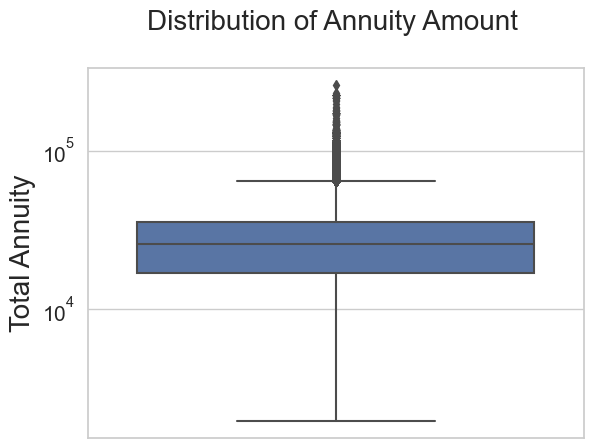

In [95]:
# Distribution of Annuity,

sns.set_style('whitegrid')

sns.boxplot(data=target_0, y='AMT_ANNUITY')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Annuity', fontsize=20)
plt.title('Distribution of Annuity Amount \n', fontsize=20)

plt.show()

##### Conclusions from the graph:

> 1. The first quartile is bigger than the third quartile.
> 2. Also, some outliers are present in the Anuuity boxplot.

#### For Target=1

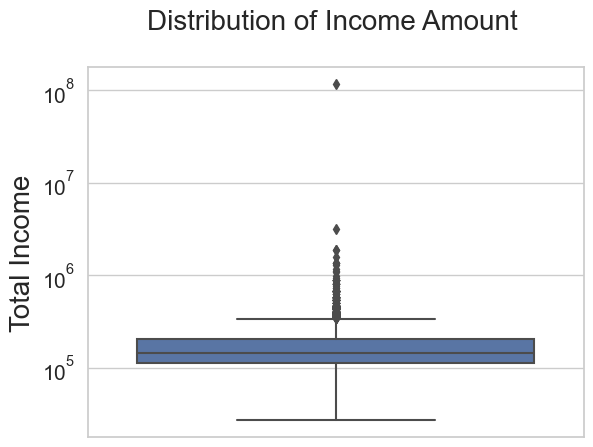

In [96]:
# Distribution of Income Amount,

sns.set_style('whitegrid')

sns.boxplot(data=target_1, y='AMT_INCOME_TOTAL')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Income', fontsize=20)
plt.title('Distribution of Income Amount \n', fontsize=20)

plt.show()

##### Conclusions from the graph:

> 1. The Income dataset appears to have a significant outlier.
> 2. The client's income is located in the third quartile.

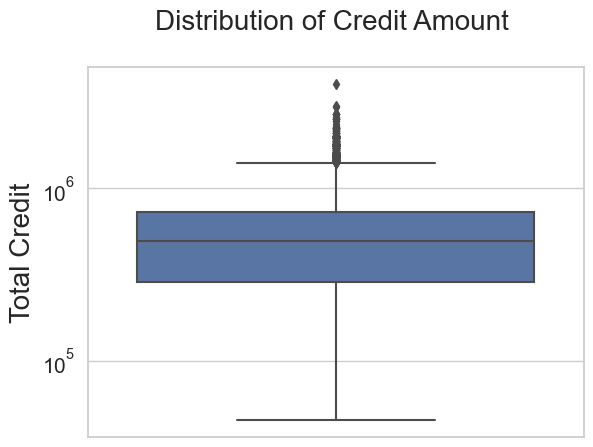

In [97]:
# Distribution of Credit Amount,

sns.set_style('whitegrid')

sns.boxplot(data=target_1, y='AMT_CREDIT')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Credit', fontsize=20)
plt.title('Distribution of Credit Amount \n', fontsize=20)

plt.show()

##### Conclusions from the graph:

> 1. Since the first quartile is greater than the third, the first quartile contains the majority of the client credit. 
> 2. Also, some outliers are present in the Credit boxplot.

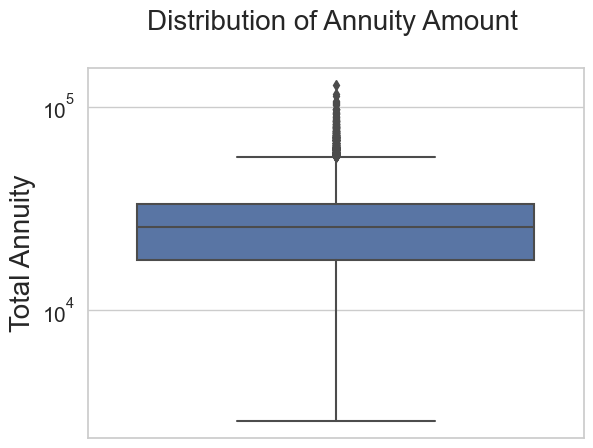

In [98]:
# Distribution of Annuity,

sns.set_style('whitegrid')

sns.boxplot(data=target_1, y='AMT_ANNUITY')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Annuity', fontsize=20)
plt.title('Distribution of Annuity Amount \n', fontsize=20)

plt.show()

##### Conclusions from the graph:

> 1. The first quartile exceeds the third quartile in size.
> 2. Also, some outliers are present in the Annuity boxplot.

## Multivariate Analysis

#### Target = 0

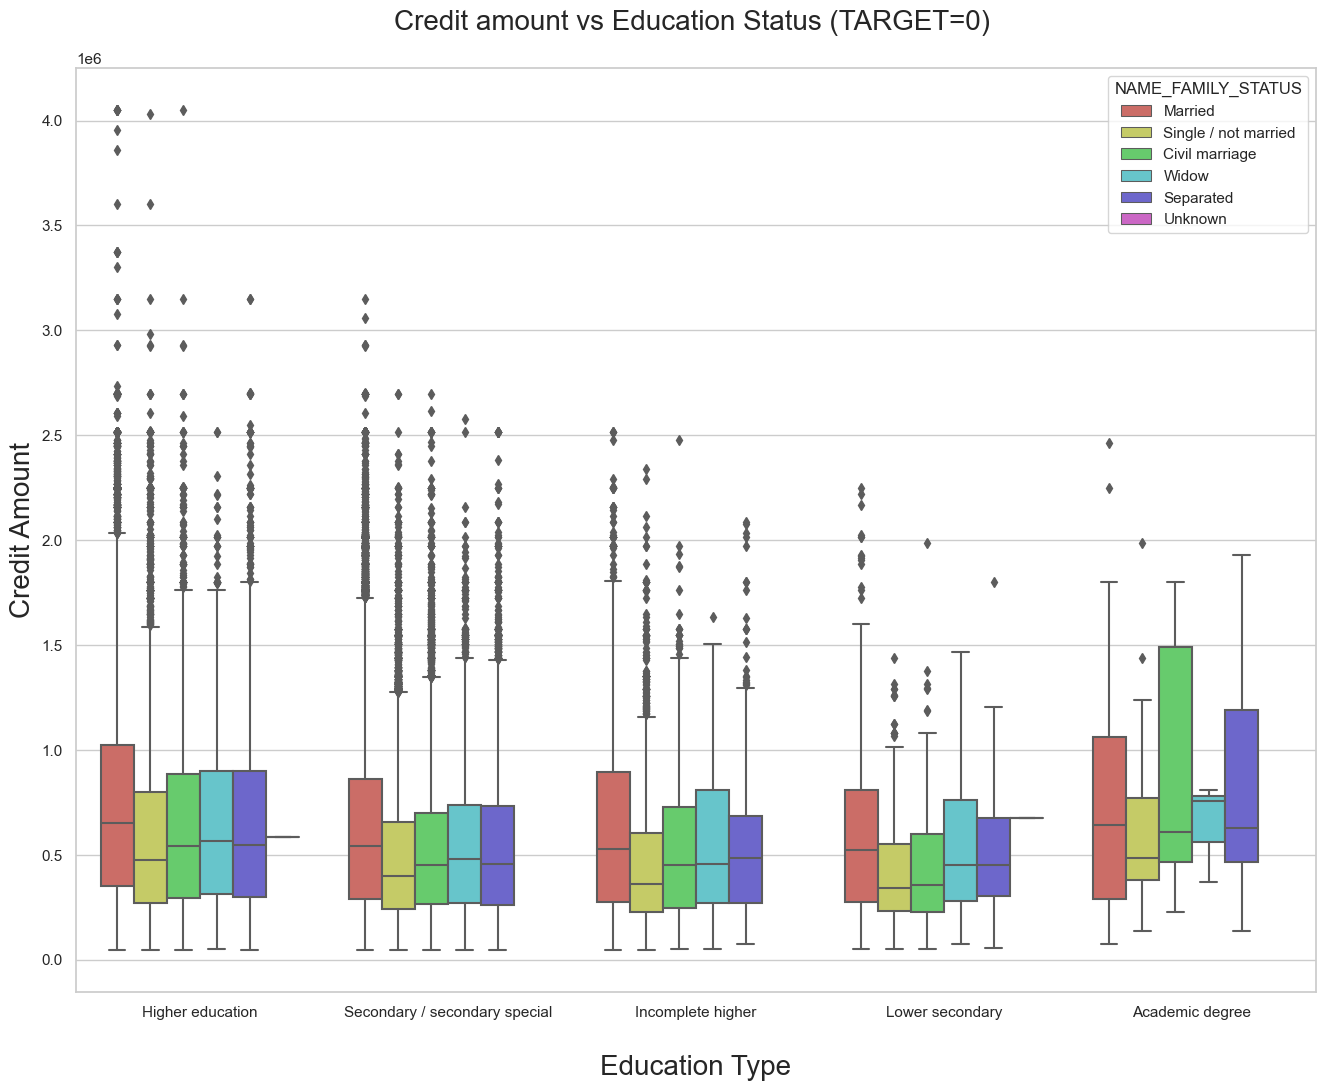

In [99]:
# Box Plotting for the Target = 0, Credit Amount

plt.figure(figsize=[16,12])

sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v', palette='hls')

plt.xticks(rotation=0)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('Credit Amount', fontsize=20)
plt.title('Credit amount vs Education Status (TARGET=0) \n', fontsize=20)
plt.show()

##### Conclusions from the graph:

> 1. We can infer from the above box plot that academic degree holders with family statuses of "Civil marriage," "Marriage," and "Separated" have more credits than those with other statuses. 
> 2. Additionally, there are more outliers in higher education in the categories of "Marriage," "Single," and "Civil marriage." 
> 3. Most of the credits for civil unions for academic degrees are in the third quartile.


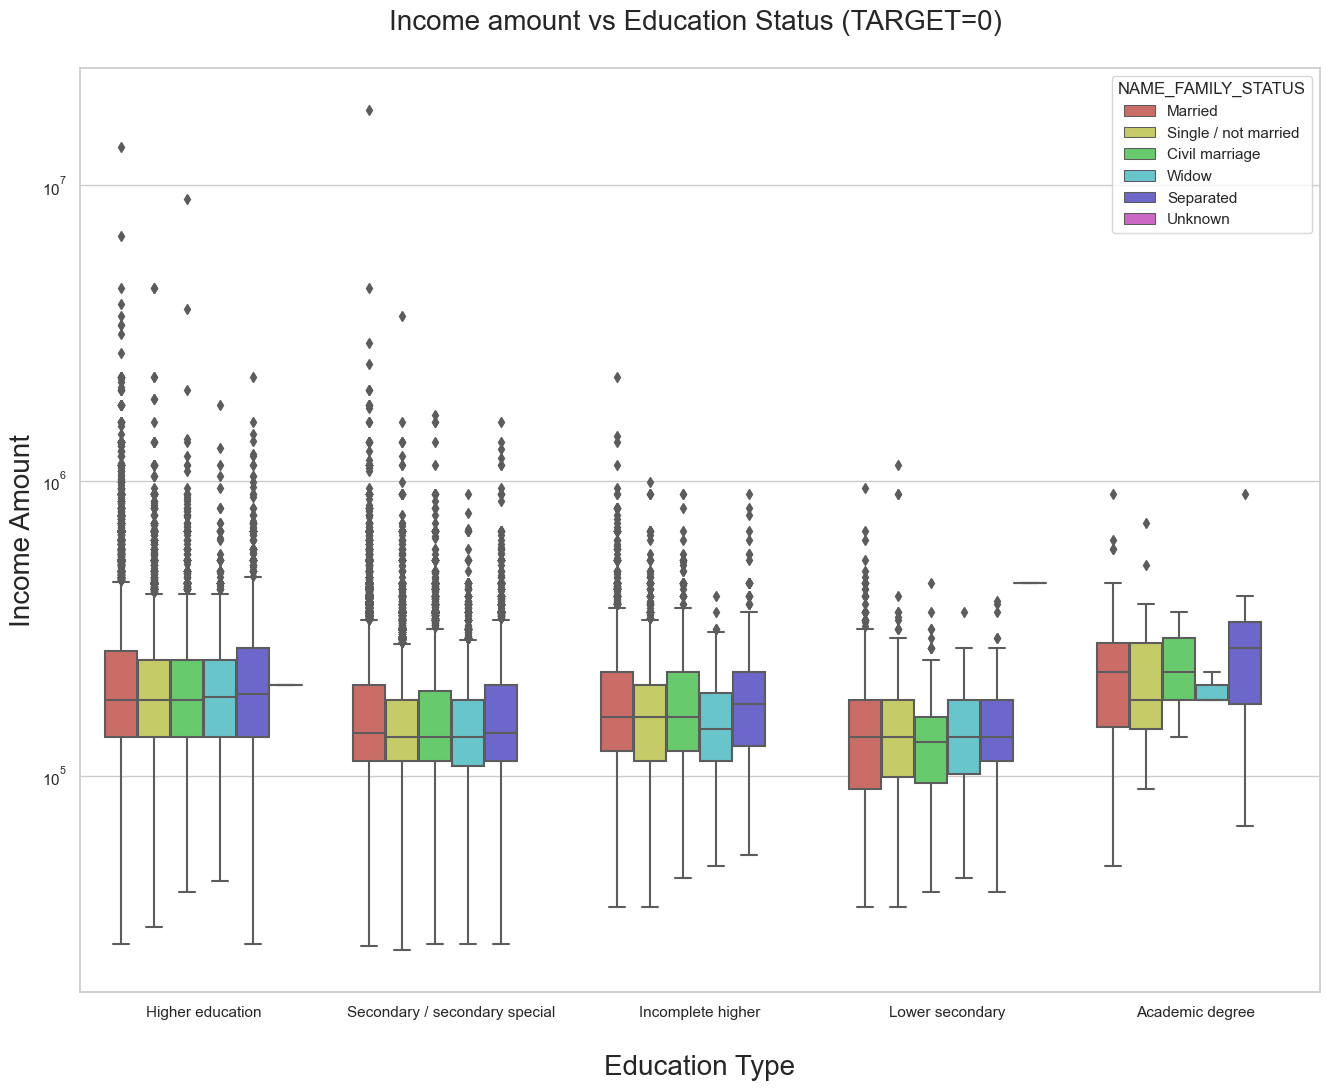

In [100]:
# Box Plotting for the Target = 0, Income Amount

plt.figure(figsize=[16,12])

sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v', palette='hls')

plt.xticks(rotation=0)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('Income Amount', fontsize=20)
plt.yscale('log')
plt.title('Income amount vs Education Status (TARGET=0) \n', fontsize=20)

plt.show()

##### Conclusions from the graph:

> 1. According to the boxplot above, the salary amount and family status are largely equivalent for the education type "Higher education." There are a lot of outliers in it.
> 2. Less outlier are having for Academic degree but there income amount is little higher that Higher education. 
> 3. Lower secondary of civil marriage family status are have less income amount than others.


#### Target = 1

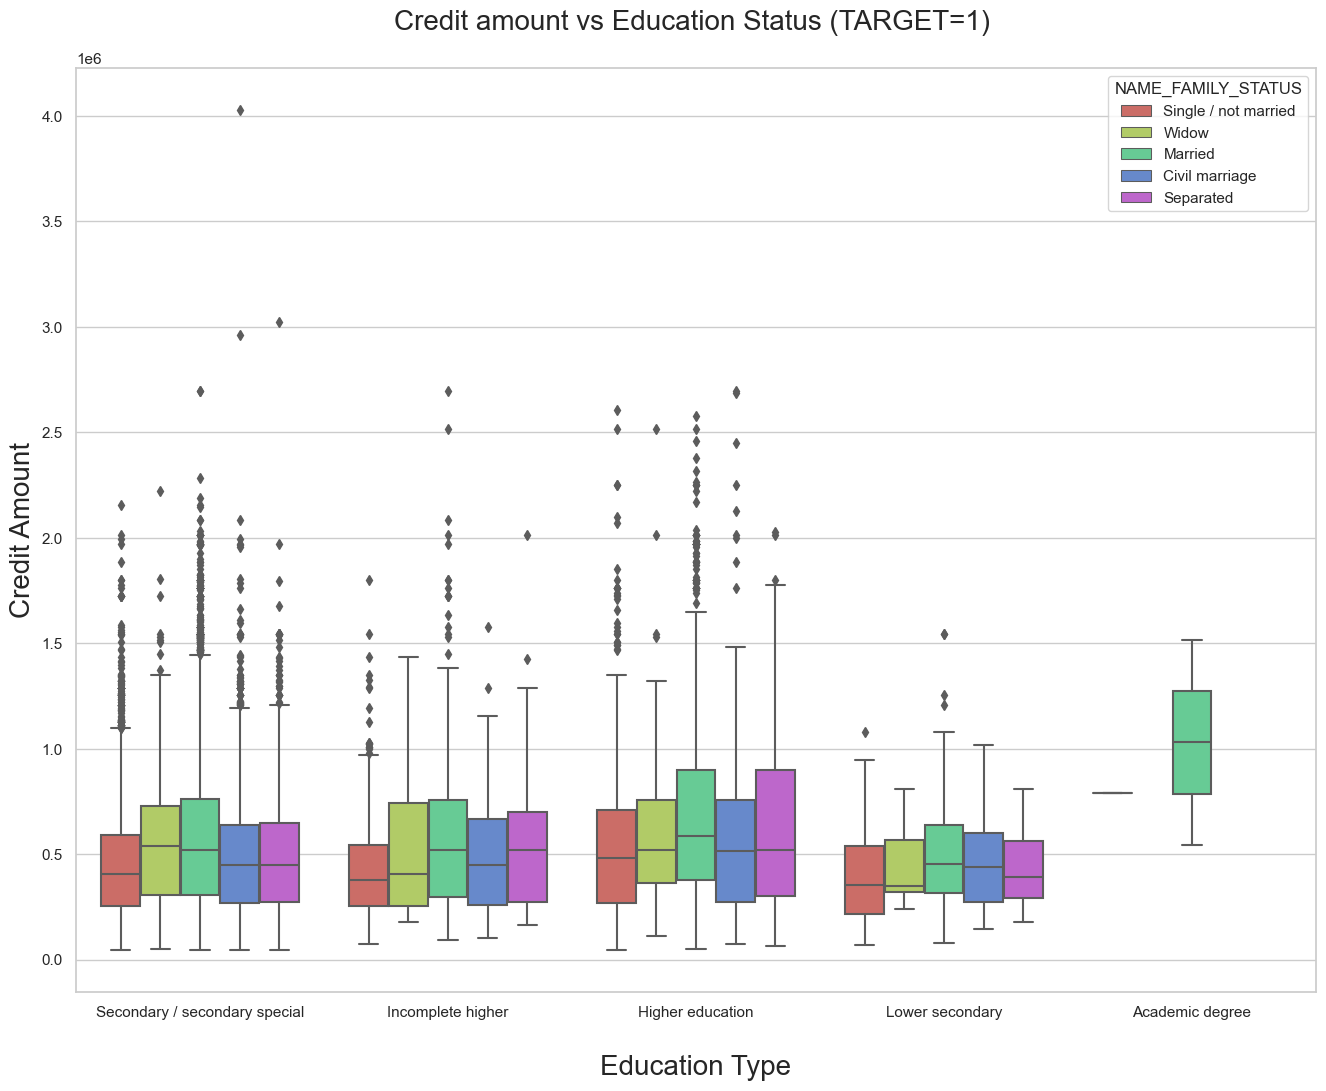

In [101]:
# Box Plotting for the Target = 1, Credit Amount

plt.figure(figsize=[16,12])

sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS', orient='v', palette='hls')

plt.xticks(rotation=0)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('Credit Amount', fontsize=20)
plt.title('Credit amount vs Education Status (TARGET=1) \n', fontsize=20)
plt.show()

##### Conclusions from the graph:

> 1. According to the above box plot, Academic degree education with family statuses of "Civil marriage," "Marriage," and "Separated" have more credits than those with other statuses. 
> 2. Higher education and secondary make up the majority of the outliers in the data. 
> 3. Most of the credits for civil marriage for Academic degrees are in the third quartile.

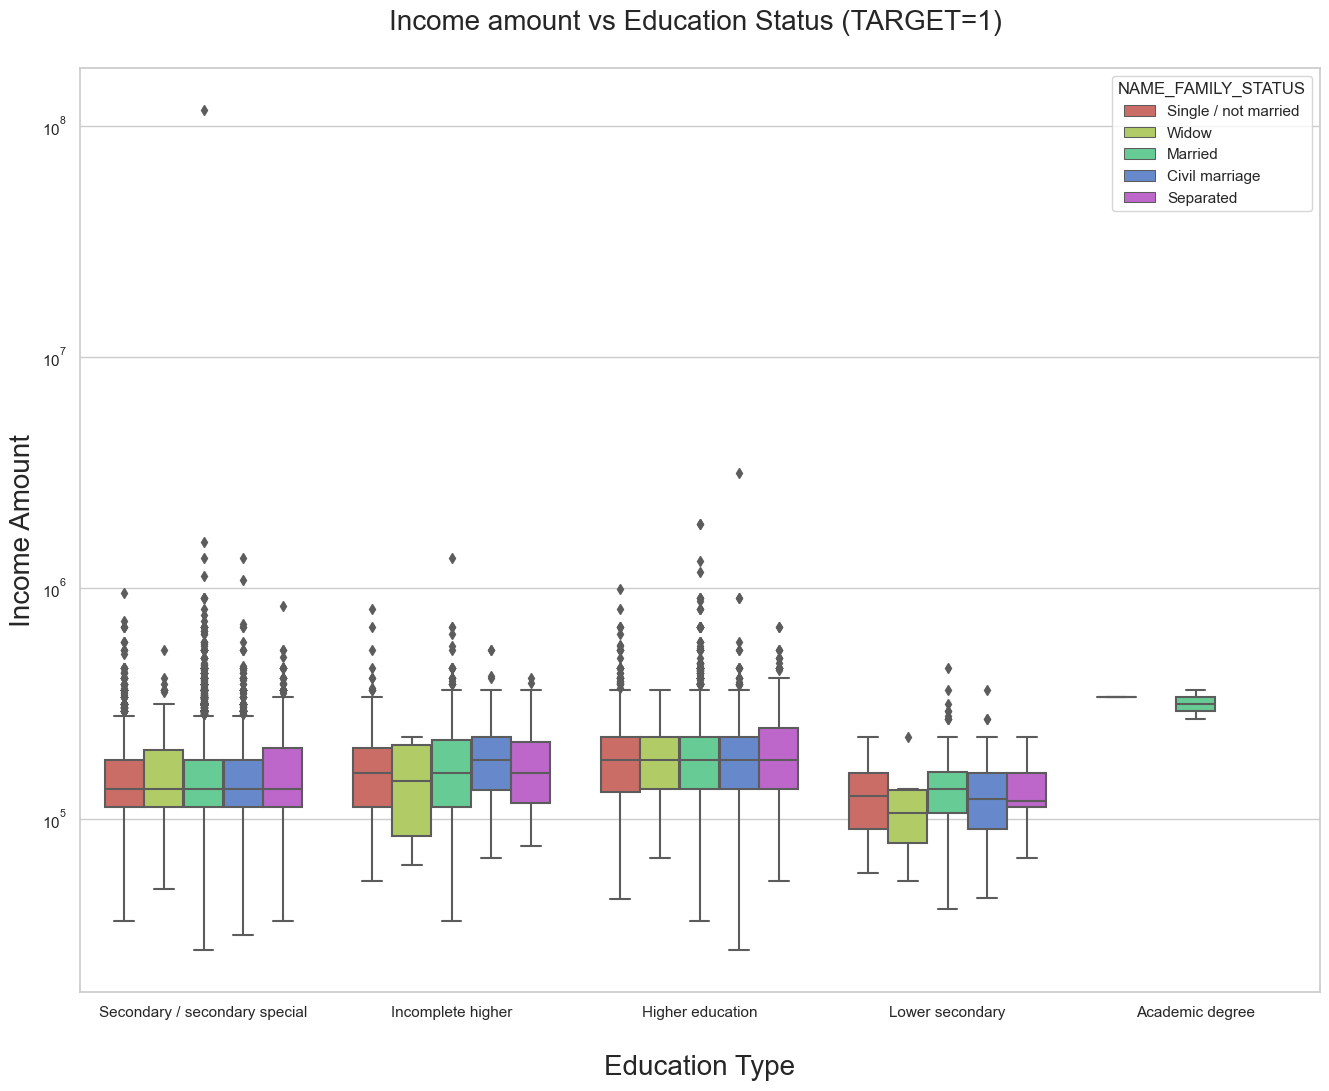

In [102]:
# Box Plotting for the Target = 1, Income Amount

plt.figure(figsize=[16,12])

sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v', palette='hls')

plt.xticks(rotation=0)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('Income Amount', fontsize=20)
plt.yscale('log')
plt.title('Income amount vs Education Status (TARGET=1) \n', fontsize=20)
plt.show()

##### Conclusions from the graph:

> 1. According to the boxplot above, the salary amount and family status are largely equivalent for the education type "Higher education." 
> 2. Less outliers are there in Academic degree, yet their salary is a little higher than that of those with higher education. 
> 3. Lower secondary have less income amount than others.

## Work on previous_application dataset

In [103]:
# Reading the dataset

df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle,POS mobile with interest
1,2802425,108129,Cash loans,607500.0,679671.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,112500.0,136444.5,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high
3,2819243,176158,Cash loans,450000.0,470790.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high


In [104]:
# Checking for the null values again in the dataset,

round((100*df_prev.isnull().sum()/len(df_prev)), 2)

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY           0.00
NAME_YIELD_GROUP               0.00
PRODUCT_COMBINATION            0.02
dtype: float64

In [105]:
# Checking the NAME_CASH_LOAN_PURPOSE column for any unique data,

df_prev.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [106]:
# Removing the 'XNA' and 'XAP' column values from the column,

df_prev = df_prev.drop(df_prev[df_prev.NAME_CASH_LOAN_PURPOSE=='XNA'].index)
df_prev = df_prev.drop(df_prev[df_prev.NAME_CASH_LOAN_PURPOSE=='XAP'].index)

In [107]:
# Rechecking the NAME_CASH_LOAN_PURPOSE for the values.

df_prev.NAME_CASH_LOAN_PURPOSE.value_counts()

Repairs                             23765
Other                               15608
Urgent needs                         8412
Buying a used car                    2888
Building a house or an annex         2693
Everyday expenses                    2416
Medicine                             2174
Payments on other loans              1931
Education                            1573
Journey                              1239
Purchase of electronic equipment     1061
Buying a new car                     1012
Wedding / gift / holiday              962
Buying a home                         865
Car repairs                           797
Furniture                             749
Buying a holiday home / land          533
Business development                  426
Gasification / water supply           300
Buying a garage                       136
Hobby                                  55
Money for a third person               25
Refusal to name the goal               15
Name: NAME_CASH_LOAN_PURPOSE, dtyp

## Merging the two datasets, i.e. application_dataset and previous_application

In [108]:
# Verifying shape before merging

print(df_app.shape, df_prev.shape)

(252137, 45) (69635, 23)


In [109]:
# Merging of the two datasets,

loan_merg = pd.merge(left = df_app, right = df_prev, how = 'inner', on = 'SK_ID_CURR', suffixes = '_x')
loan_merg.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_IN_YEARS,EMPLOYMENT_YEARS,REGISTRATION_YEARS,YEARS_ID_PUBLISH,LAST_PHONE_CHANGE_YEARS,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_APPLICATION,AMT_CREDITx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,1.0,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.502779,0.0,0.0,0.0,0.0,0,0,0,0,0,0,28.0,3.0,13,8.0,2.0,"75000,100000",150000-200000,1390369,Cash loans,94500.0,109971.0,FRIDAY,11,Y,1,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,2.0,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.0,0.0,0.0,0.0,0,0,0,1,0,5,42.0,7.0,14,10.0,4.0,275000-300000,650000-700000,1344613,Cash loans,1260000.0,1260000.0,WEDNESDAY,14,Y,1,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action,Cash Street: low
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,3.0,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.321745,2.0,0.0,2.0,0.0,0,0,0,0,1,1,32.0,6.0,10,10.0,2.0,350000-375000,700000-750000,1077565,Cash loans,1350000.0,1487214.0,MONDAY,14,Y,1,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal,Cash Street: low
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,2.0,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.738053,1.0,0.0,1.0,0.0,0,0,0,1,0,1,44.0,5.0,23,12.0,1.0,175000-200000,500000-550000,1223113,Cash loans,337500.0,407911.5,MONDAY,13,Y,1,Repairs,Approved,-539,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal,Cash Street: low
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,2.0,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.738053,1.0,0.0,1.0,0.0,0,0,0,1,0,1,44.0,5.0,23,12.0,1.0,175000-200000,500000-550000,1529558,Cash loans,450000.0,555723.0,MONDAY,15,Y,1,Repairs,Refused,-449,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal,Cash Street: low


In [110]:
#checking the columns

list(loan_merg.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE_',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'CNT_FAM_MEMBERS',
 'WEEKDAY_APPR_PROCESS_START_',
 'HOUR_APPR_PROCESS_START_',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AGE_IN_YEARS',
 'EMPLOYMENT_YEARS',
 'REGISTRATION_YEARS',
 'YEARS_ID

In [111]:
# Renaming the columns in the loan_merg datasets,

loan_merg = loan_merg.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [112]:
# Removing the unwanted columns from the dataset for the ease of analysis

loan_merg.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

## Performing the Univariate analysis

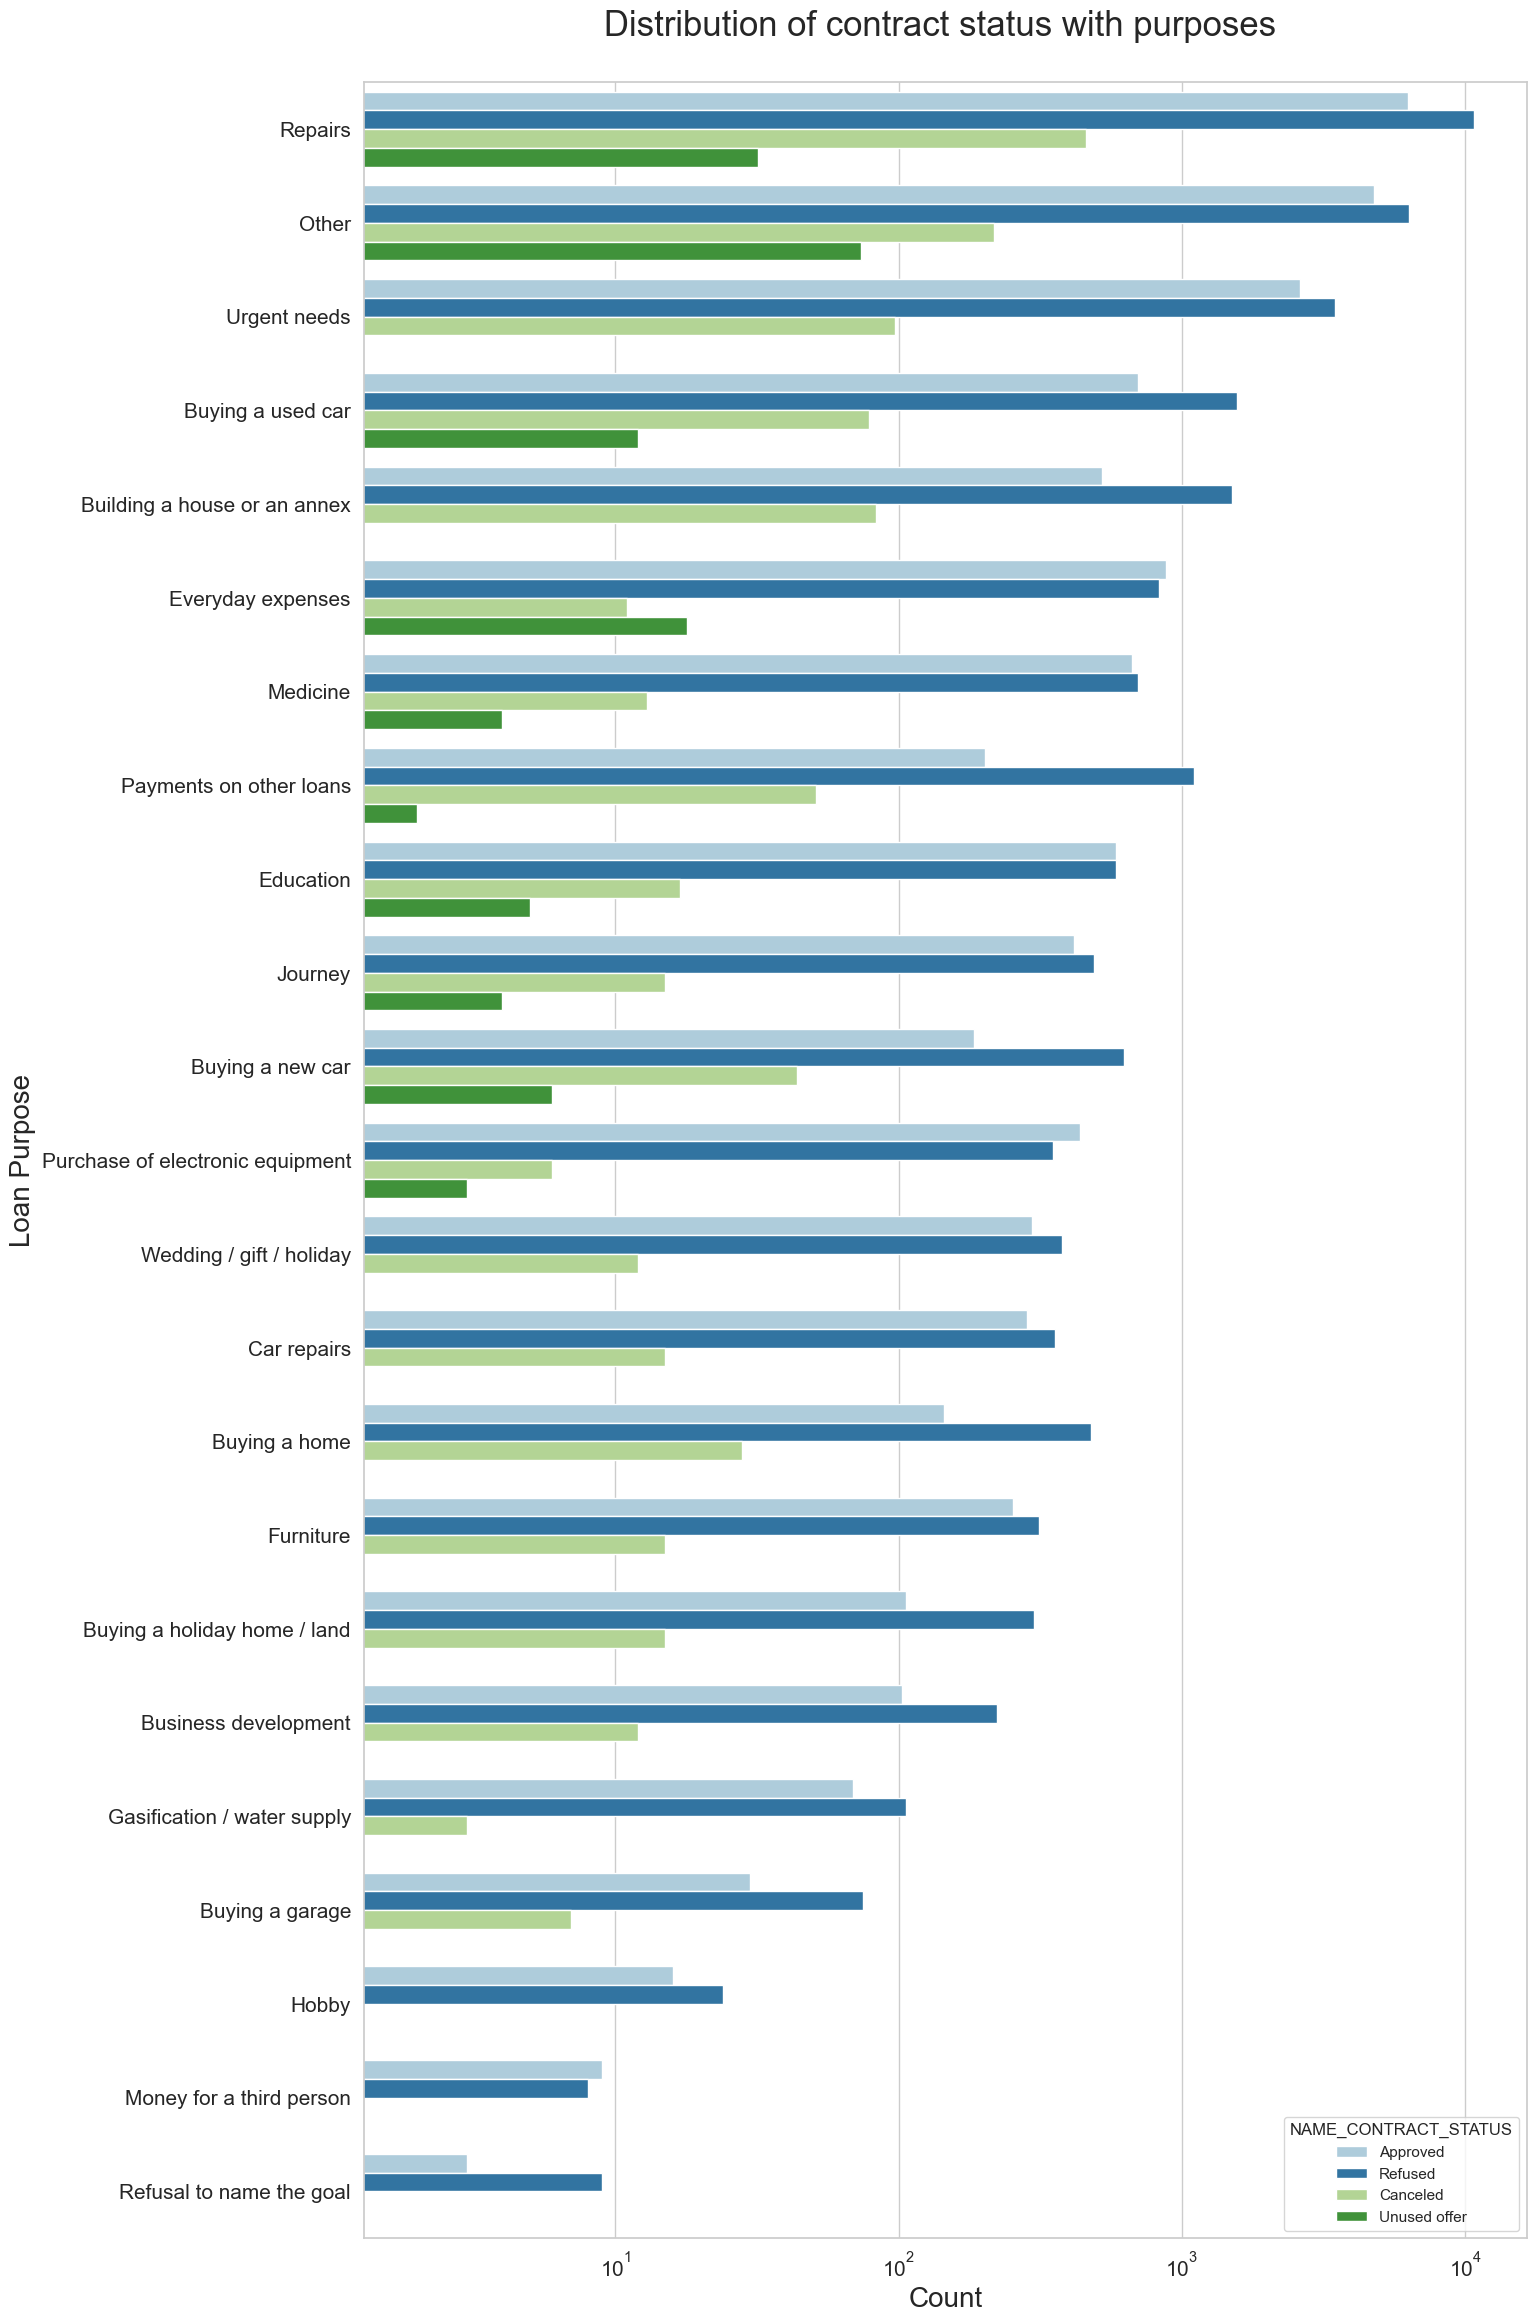

In [113]:
# Plotting for the Contract Status,

plt.figure(figsize=[15,28])

sns.countplot(data = loan_merg, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=loan_merg['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='Paired')

plt.title('Distribution of contract status with purposes \n', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Loan Purpose', fontsize=20)
plt.xscale('log')

plt.show()

##### Conclusions from the graph:

> 1. The majority of loan rejections were for the "Repairs".
> 2. We have an equal amount of approvals and rejections for educational purposes.
> 3. The rejection rate for paying off other debt and getting a new car is significantly greater than the approval rate.

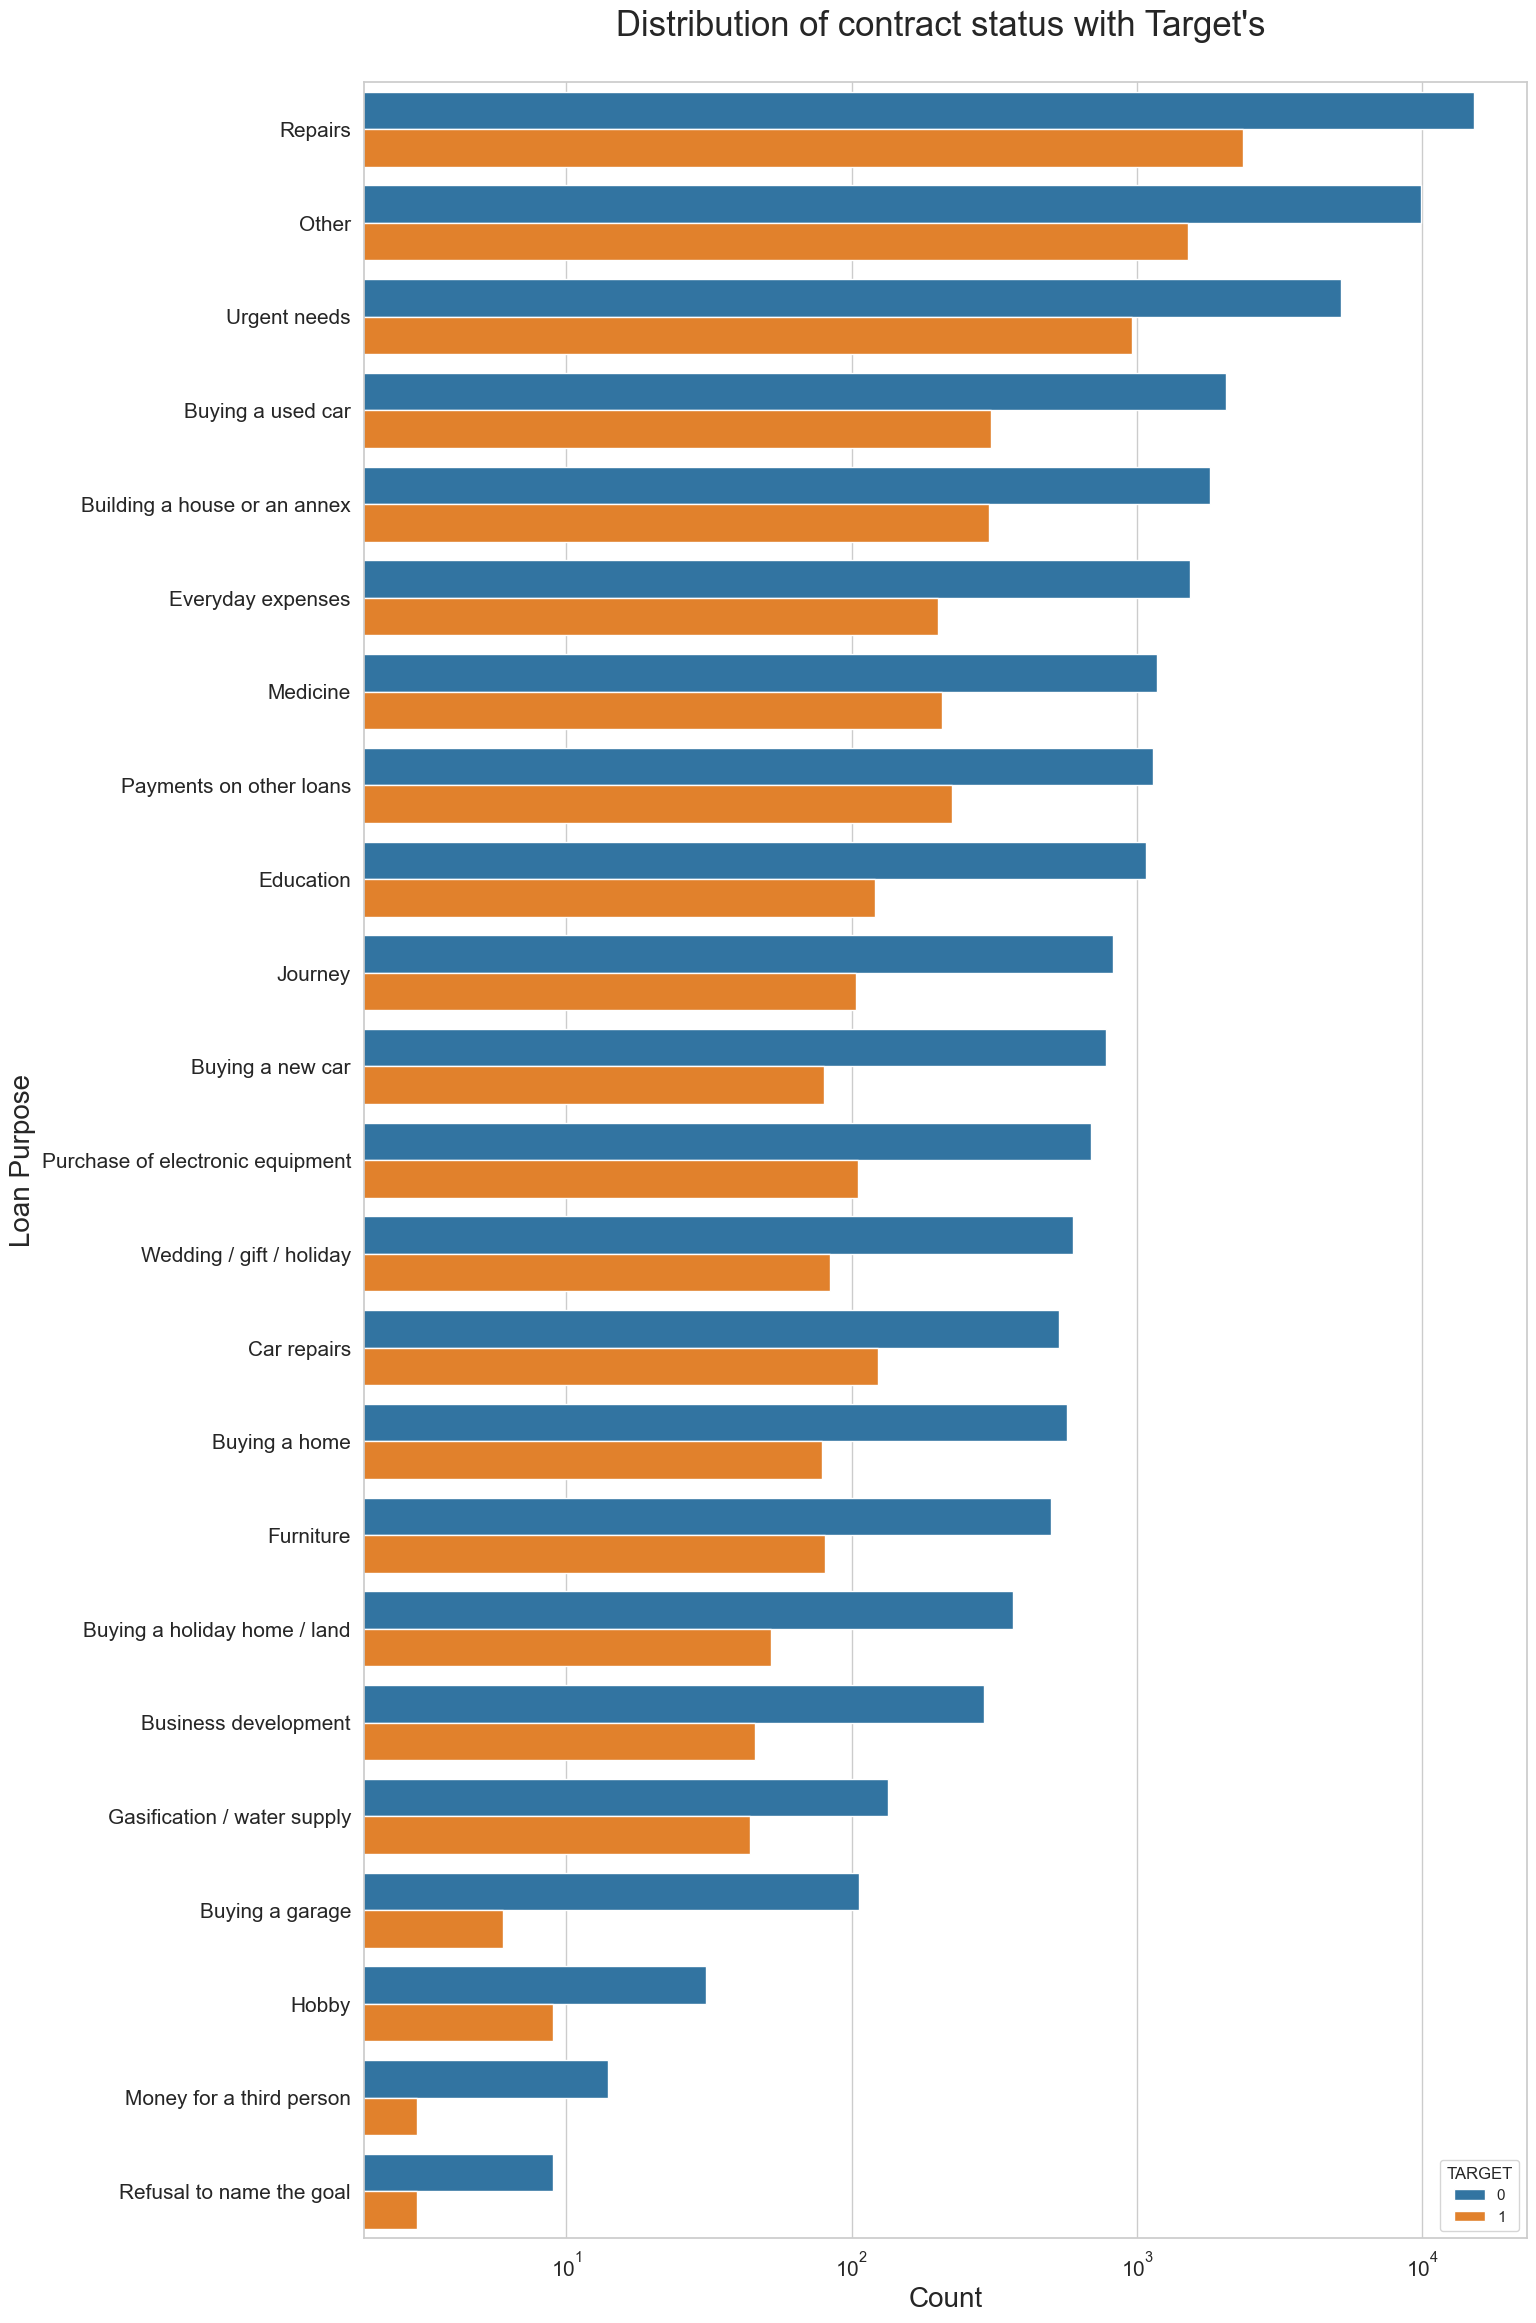

In [114]:
# Plotting for the Contract Status,

plt.figure(figsize=[15,28])

sns.countplot(data = loan_merg, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=loan_merg['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='tab10')

plt.title('Distribution of contract status with Target\'s \n', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Loan Purpose', fontsize=20)
plt.xscale('log')

plt.show()

##### Conclusions from the graph:

> 1. Loan purposes with "Repairs" are having difficulties making timely payments.
> 2. There are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education'. Therefore, we can concentrate on these goals for which the client is experiencing just minor payment issues.


## Performing the bivariate analysis

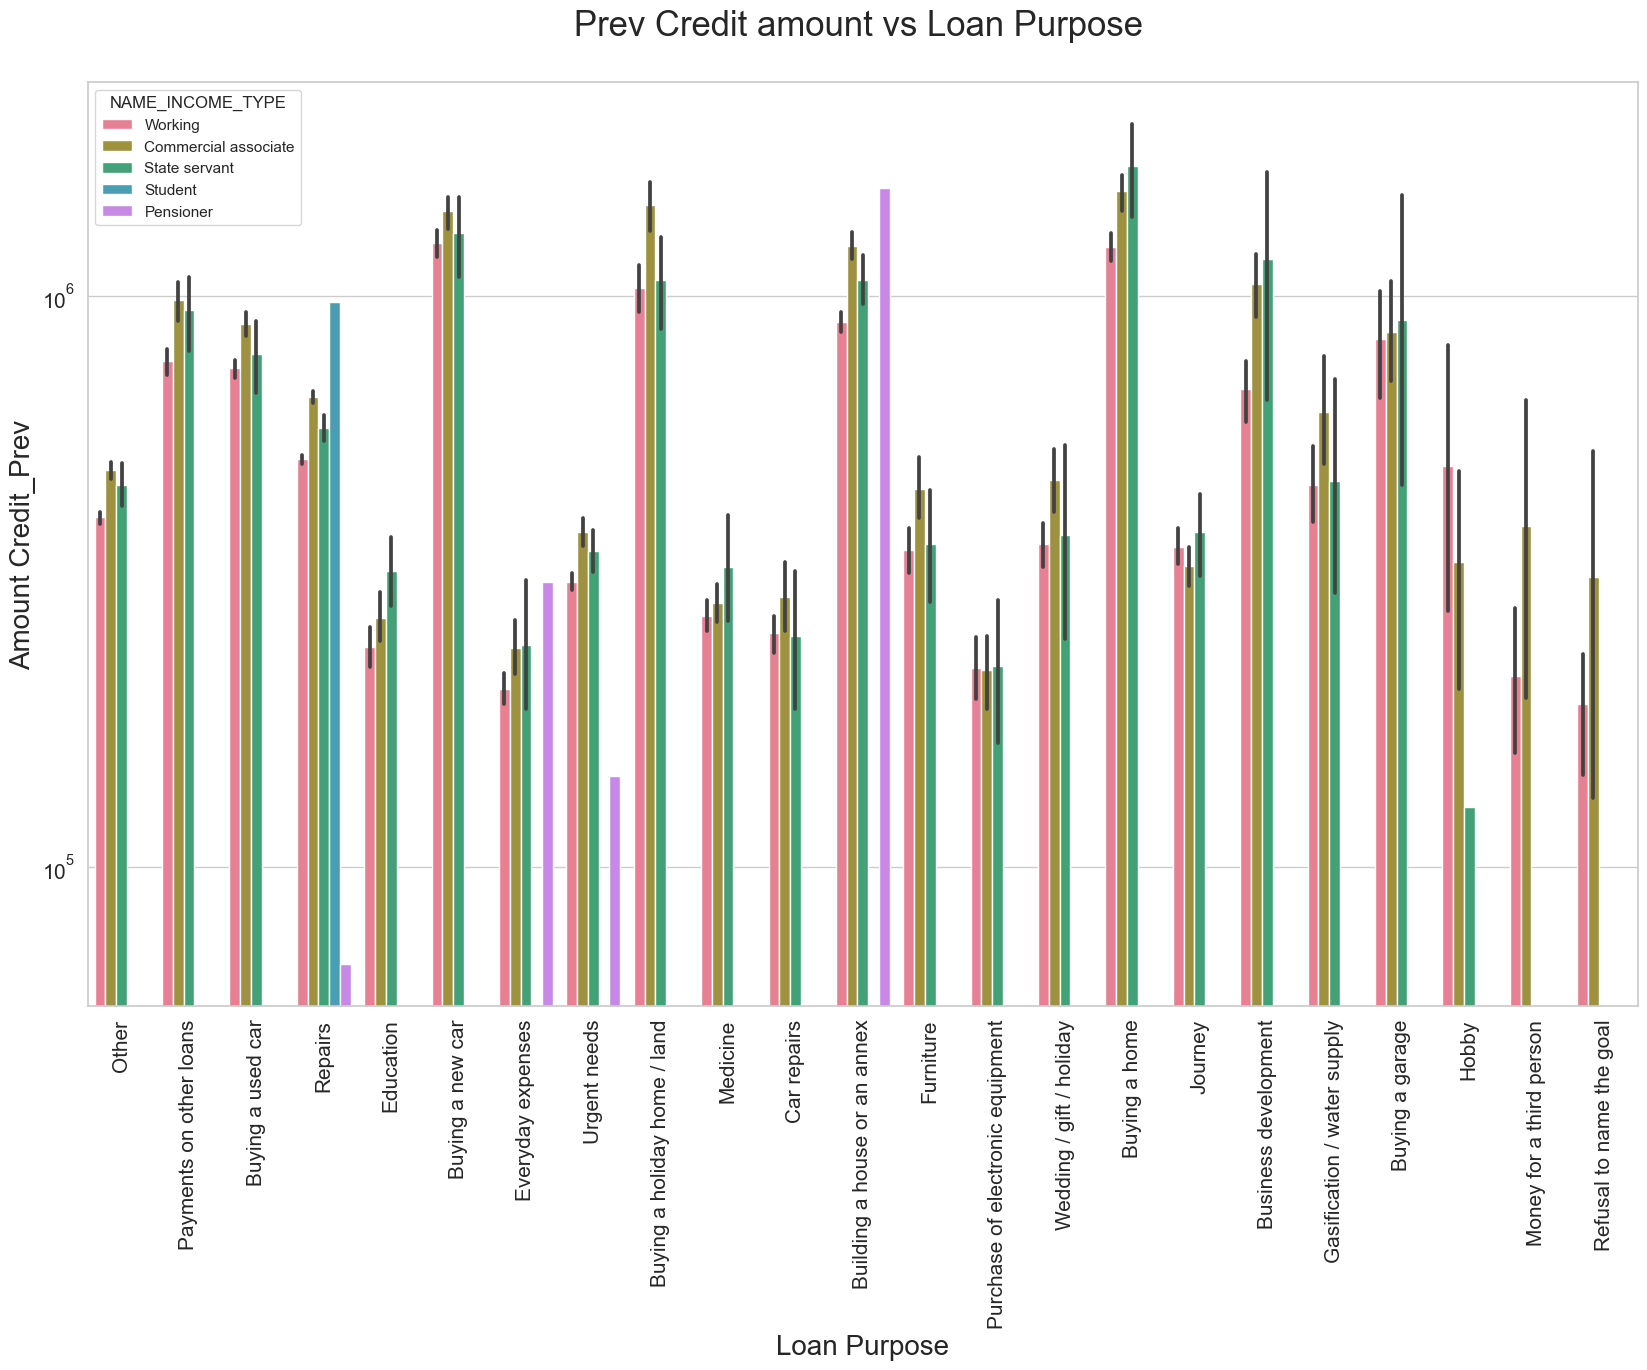

In [115]:
# Plotting for Credit amount in logarithmic scale

plt.figure(figsize=(20,12))

sns.barplot(data = loan_merg, x='NAME_CASH_LOAN_PURPOSE', hue='NAME_INCOME_TYPE', y='AMT_CREDIT_PREV', orient='v', palette='husl')
plt.xticks(rotation=90)
plt.ylabel('Amount Credit_Prev', fontsize=20)
plt.xlabel('Loan Purpose', fontsize=20)
plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Prev Credit amount vs Loan Purpose \n', fontsize=25)

plt.show()

##### Conclusions from the graph:

> 1. For loan objectives such as "buying a home," "buying a land," "buying a new car," and "building a house," the credit amount is larger.
> 2. Income type of state servants have a significant amount of credit applied.
> 3. Less credits are requested when money is needed for a hobby or third party.


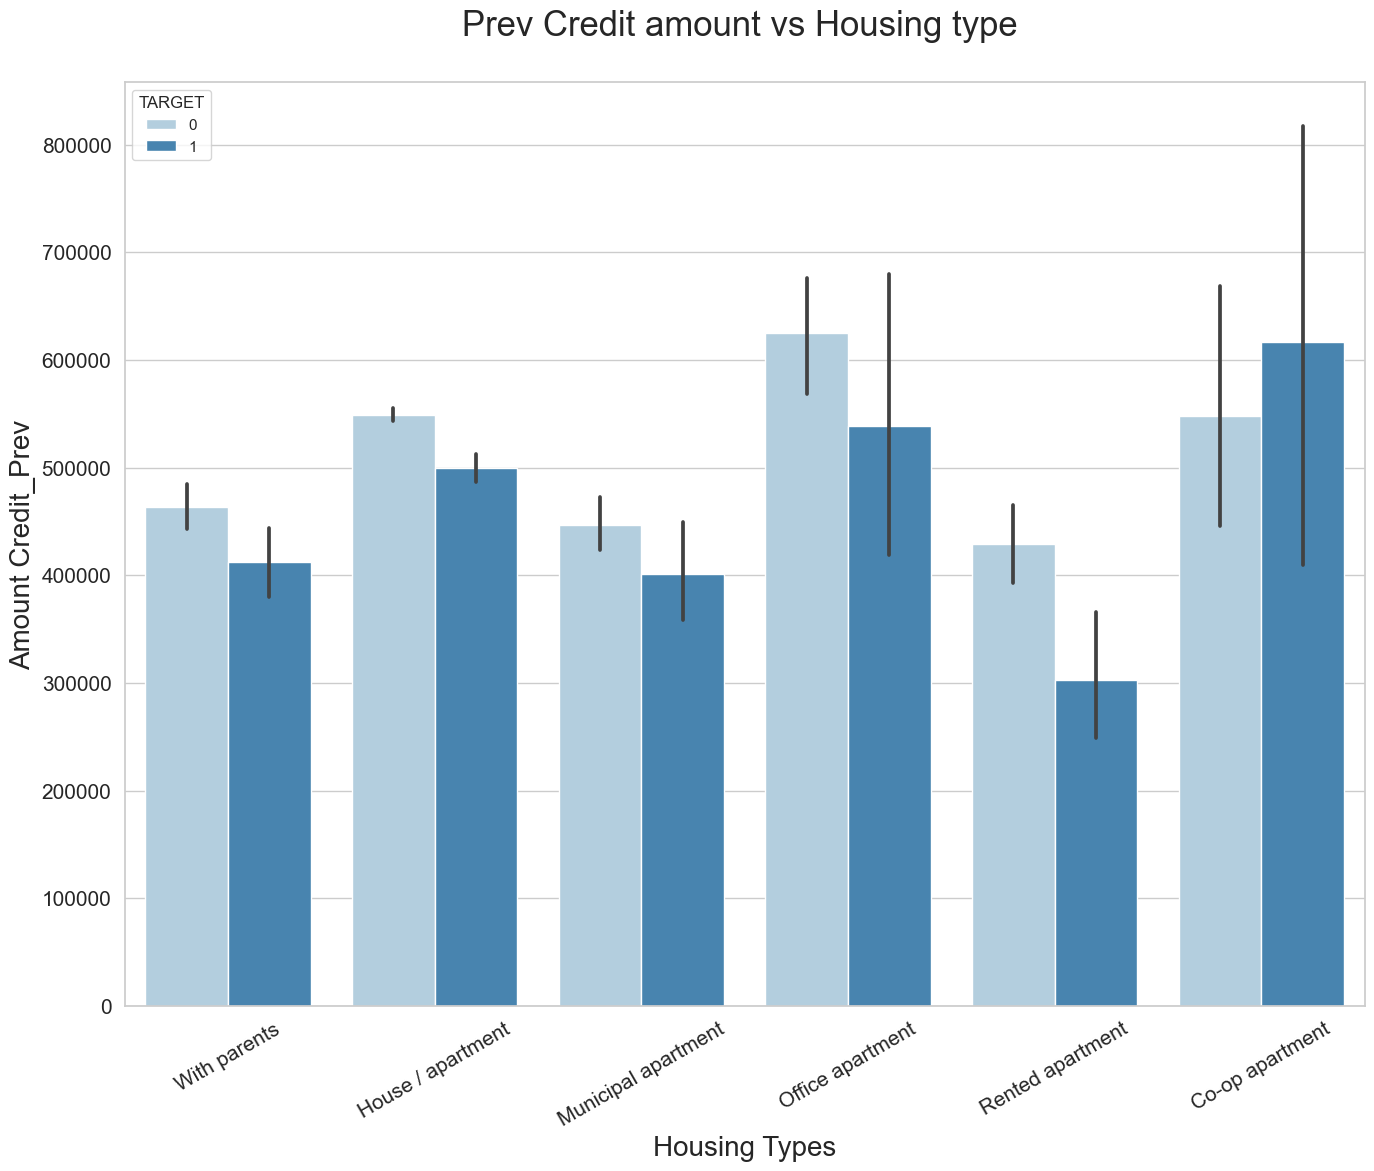

In [116]:
# Plotting for Credit amount prev vs Housing type,

plt.figure(figsize=(16,12))
plt.xticks(rotation=30)
sns.barplot(data =loan_merg, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE', palette='Blues')
plt.title('Prev Credit amount vs Housing type \n', fontsize=25)
plt.ylabel('Amount Credit_Prev', fontsize=20)
plt.xlabel('Housing Types', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

##### Conclusions from the graph:

> 1. Here, the office apartment has a higher credit of target=0 while the co-op apartment has a higher target=1.  
> 2. We can therefore draw the conclusion that a bank should refrain from lending to the co-op apartment as they are having difficulties in payment.
> 3. For successful payments, the bank can concentrate mostly on housing types such as those with parents, Houses\apartments, or municipal apartments.

## Conclusions of this loan data analysis:

> As there are fewer payment issues, banks should grant more loans for Office apartment and Co-Op apartment housing type.

> Banks need to offer loans for "Repairs" and "Other" purposes.

> 'Business Entity Type-3' and 'Self-Employed' customers should be eligible for loans from banks.

> The ideal people to target for the loans are those who are "working," particularly female employers.